<a href="https://colab.research.google.com/github/dquynhu/dquynhu.github.io/blob/main/Final_Project_eCommerce_Customer_Service_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **eCommerce Customer Service Satisfaction**

# Table of Contents

>[eCommerce Customer Service Satisfaction](#scrollTo=oAWwp8SkqC3W)

>[Table of Contents](#scrollTo=ytK0eakoLMpx)

>[I. Introduction](#scrollTo=T0L7rJt_kZbs)

>>[Overview](#scrollTo=6FhjlxYXcfTU)

>>[Importance of CSAT in e-Commerce](#scrollTo=ofp-atdHbnql)

>>[Objectives](#scrollTo=XRy7jOnk7sft)

>[II. Data Description](#scrollTo=zfNRT4PFb2cW)

>[III. Exploratory Data Analysis of Dataset](#scrollTo=6dyfGYIHnh75)

>>[Data Cleaning](#scrollTo=1rmrou8UoWmw)

>>[Univariate Analysis: CSAT Score](#scrollTo=6p2ZsB9JUlPj)

>>[Bivariate Analysis](#scrollTo=7LuyC8J7UIBJ)

>>>[1. by Channel](#scrollTo=jjSfaaFkWJTq)

>>>[2. by Categories](#scrollTo=74MfwtB-UWVi)

>>>[3. by Response Time](#scrollTo=morrz97UU7zS)

>>>[4. by Tenure Bucket](#scrollTo=mwDvC1SkXWxm)

>>>[5. by Shift](#scrollTo=NAxYMSOkcxDp)

>>>[6. by Agents](#scrollTo=ogAnq0bGU05Q)

>>>[7. by Supervisors](#scrollTo=0kOFMjrPGt-Y)

>>>[8. by Managers](#scrollTo=cq9CseZhdpZC)

>>[Multivariate Analysis](#scrollTo=dGvjrVJXebbF)

>>>>[1. by Channel and other features](#scrollTo=vc9Uj4PmXss2)

>>>>[2. by Category and other features](#scrollTo=Zg2IqakaB4AK)

>>>>[3. by Response Time and other features](#scrollTo=kab4qrPrznUh)

>>>>[4. by Tenure Bucket and other features](#scrollTo=WmerBvvw30j2)

>>>>[5. by Workforce and other features](#scrollTo=Td6qiloSw2KM)

>>[Performance Evaluation](#scrollTo=YDVO_ieZ8-y4)

>[IV. Prediction Model](#scrollTo=4G6XSYodyw_A)

>>>[Preprocessing](#scrollTo=MWDUby-ZKktP)

>>>[Linear Regression](#scrollTo=CauK1rUOx2xB)

>>>[Logistic Regression Model](#scrollTo=ptT3jVVpK_Y6)

>>>[Random Forest Model](#scrollTo=R-Ium2RYL_Qt)

>>>[Decision Tree](#scrollTo=cMBWy0GeWy6D)

>>>[Modeling with SMOTE](#scrollTo=zsdLrQcBiylq)

>[V. Conclusion](#scrollTo=JC_TB_frK2C-)

>[VI. Recommendations](#scrollTo=7NDGgWzZK7fN)

>[Areas for Further Exploration](#scrollTo=4uI-sEOgohPH)

>[Tableau Dashboard](#scrollTo=040LmYnhZKPA)



# I. Introduction


> ## 1. Overview

<!-- An introduction that introduces the topic, background, and research question -->

During the boom period of e-commerce, especially after the crisis caused by the covid epidemic, the opportunities and challenges of the e-commerce industry are increasingly greater. Maintaining customer satisfaction and returning customers plays an important role in the success of businesses in this field. In the fast-paced world of eCommerce, customer service satisfaction stands as a cornerstone for success. With the absence of face-to-face interaction, providing exceptional customer service becomes paramount in building trust, loyalty, and ensuring repeat business.

There are many Metrics for Measuring Customer Service Satisfaction such as Customer Satisfaction Score (CSAT), Net Promoter Score (NPS), First Contact Resolution (FCR), Customer Effort Score (CES), Average Response Time, Churn Rate, ...

> ## 2. Importance of CSAT in e-Commerce

CSAT is a critical metric for evaluating customer perceptions and experiences.

- Definition: CSAT measures customer satisfaction through surveys, reflecting perceptions of products, services, or experiences. With lowest score is 1 and highest score is 5.
- Importance: Tracks customer satisfaction to identify improvement areas, guiding strategic adjustments in customer service and product development.
- Impact: Monitoring CSAT helps address concerns proactively, enhancing offerings and strengthening overall customer experience.
- Focus of Study: Investigates the link between CSAT and critical business outcomes like customer loyalty, brand perception, and revenue growth in eCommerce.
- Goal: Provides actionable insights to help eCommerce businesses improve service standards and achieve sustainable success in a competitive market.

>## 3. Objectives

The dataset captures customer satisfaction scores for a one-month period at an e-commerce platform called Shopzilla (a pseudonym).

The objectives in this analysis report:

1. `Assess Satisfaction`: Measure and analyze customer satisfaction levels through targeted surveys.
2. `Uncover Drivers`: Identify primary factors contributing to customer satisfaction and dissatisfaction.
3. `Evaluate Performance`: Scrutinize current practices to pinpoint performance strengths and weaknesses.
4. `Recommend Actions`: Provide concrete, actionable steps to improve customer satisfaction and business outcomes.

# II. Data Description



1. `Unique id`	Unique identifier for each record
2. `Channel name`	Name of the customer service channel
3. `Category`	Category of the interaction
4. `Sub-category`	Sub-category of the interaction
5. `Customer Remarks`	Feedback provided by the customer
6. `Order id`	Identifier for the order associated with the interaction
7. `Order date time`	Date and time of the order
8. `Issue reported at`	Timestamp when the issue was reported
9. `Issue responded`	Timestamp when the issue was responded to
10. `Survey response date`	Date of the customer survey response
11. `Customer city`	City of the customer
12. `Product category`	Category of the product
13. `Item price`	Price of the item
14. `Connected handling time`	Time taken to handle the interaction
15. `Agent name`	Name of the customer service agent
16. `Supervisor`	Name of the supervisor
17. `Manager`	Name of the manager
18. `Tenure Bucket`	Bucket categorizing agent tenure
19. `Agent Shift`	Shift timing of the agent
20. `CSAT Score`	Customer Satisfaction (CSAT) score

# III. Exploratory Data Analysis of Dataset

In [ ]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
import textwrap

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science - CoderSchool/Final Project/eCommerce Customer Service Satisfaction/Customer_support_data.csv")

In [ ]:
data.head()

Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/2023 12:52   
2  c273368d-b961-44cb-beaf-62d6fd6c00d5             NaN  01/08/2023 20:16   
3  5aed0059-55a4-4ec6-bb54-97942092020a             NaN  01/08/2023 20:56   
4  e8bed5a9-6933-4aff-9dc6-ccefd7dcde59             NaN  01/08/2023 10:30   

    issue_responded Survey_response_Date Customer_City Product_category  \
0  01/08/2023 11:47            01-Aug-23           NaN              NaN   
1  01/08/2023 12:54            01-Aug-23           NaN              NaN   
2  01/08/2023 20:38            01-Aug-23           NaN              NaN   
3  01/08/2023 21:16            01-Aug-23           NaN              NaN   
4  01/08/2023 10:32            01-Aug-23           NaN              NaN   

   Item_price  connected_handling_time           Agent_name      Supervisor  \
0         NaN                      NaN     Richard Buchanan     Mason Gupta   
1         NaN                      NaN        Vicki Collins       Dylan Kim   
2         NaN                      NaN         Duane Norman    Jackson Park   
3         NaN                      NaN       Patrick Flores     Olivia Wang   
4         NaN                      NaN  Christopher Sanchez  Austin Johnson   

           Manager    Tenure Bucket Agent Shift  CSAT Score  
0  Jennifer Nguyen  On Job Training     Morning           5  
1      Michael Lee              >90     Morning           5  
2      William Kim  On Job Training     Evening           5  
3       John Smith              >90     Evening           5  
4      Michael Lee             0-30     Morning           5

In [ ]:
# View the dimension of the dataset
data.shape

(85907, 20)

In [ ]:
# Get dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

Observation: This dataset consists of 85907 entries across 20 columns, with a mixture of object, float64, and int64 data types.

> ## 1. Data Cleaning

In [ ]:
# View all the column names
data.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# Check and drop duplicated (if any)
data.columns
data.duplicated(subset = data.columns).sum()

0

In [ ]:
# Check missing values
data.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [ ]:
# Calculate the percentage of missing values in each column
missing_values = data.isna().sum() / data.shape[0] * 100
missing_values

Unique id                   0.000000
channel_name                0.000000
category                    0.000000
Sub-category                0.000000
Customer Remarks           66.542889
Order_id                   21.222950
order_date_time            79.962052
Issue_reported at           0.000000
issue_responded             0.000000
Survey_response_Date        0.000000
Customer_City              80.119199
Product_category           79.983005
Item_price                 79.971364
connected_handling_time    99.718300
Agent_name                  0.000000
Supervisor                  0.000000
Manager                     0.000000
Tenure Bucket               0.000000
Agent Shift                 0.000000
CSAT Score                  0.000000
dtype: float64

In [ ]:
# Drop columns where more than 50% of the values are missing
data.drop(columns=missing_values[missing_values > 50].index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique id             85907 non-null  object
 1   channel_name          85907 non-null  object
 2   category              85907 non-null  object
 3   Sub-category          85907 non-null  object
 4   Order_id              67675 non-null  object
 5   Issue_reported at     85907 non-null  object
 6   issue_responded       85907 non-null  object
 7   Survey_response_Date  85907 non-null  object
 8   Agent_name            85907 non-null  object
 9   Supervisor            85907 non-null  object
 10  Manager               85907 non-null  object
 11  Tenure Bucket         85907 non-null  object
 12  Agent Shift           85907 non-null  object
 13  CSAT Score            85907 non-null  int64 
dtypes: int64(1), object(13)
memory usage: 9.2+ MB


In [ ]:
# Change type of Issue_reported at and  issue_responde to date
data["Issue_reported at"]= pd.to_datetime(data["Issue_reported at"], dayfirst=True)
data["issue_responded"]= pd.to_datetime(data["issue_responded"], dayfirst=True)

# Convert time to minutes
# data["respond_time_minutes"] = (data["issue_responded"] - data["Issue_reported at"]).dt.total_seconds() / 60

# data["respond_time"] = data["issue_responded"] - data["Issue_reported at"]
# data["respond_time_minutes"] = data["respond_time"].dt.total_seconds() / 60 # Convert time to minutes

# data[data["respond_time_minutes"] < 0]

We recognize that we have many "respond_time_minutes" < 0 because when "issue_responded" is recoreded as "2023-08-28 00:00:00", so we change all this to "2023-08-28 23:59:59"


In [ ]:
data["issue_responded"] = data["issue_responded"].replace("2023-08-28 00:00:00", "2023-08-28 23:59:59")
data["issue_responded"] = data["issue_responded"].replace("2023-08-27 00:00:00", "2023-08-27 23:59:59")
data["issue_responded"] = data["issue_responded"].replace("2023-08-25 00:00:00", "2023-08-25 23:59:59")

In [ ]:
# Convert time to minutes
data["respond_time_minutes"] = (data["issue_responded"] - data["Issue_reported at"]).dt.total_seconds() / 60

In [ ]:
data.head()

Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category                              Order_id  \
0                Life Insurance  c27c9bb4-fa36-4140-9f1f-21009254ffdb   
1  Product Specific Information  d406b0c7-ce17-4654-b9de-f08d421254bd   
2             Installation/demo  c273368d-b961-44cb-beaf-62d6fd6c00d5   
3        Reverse Pickup Enquiry  5aed0059-55a4-4ec6-bb54-97942092020a   
4                    Not Needed  e8bed5a9-6933-4aff-9dc6-ccefd7dcde59   

    Issue_reported at     issue_responded Survey_response_Date  \
0 2023-08-01 11:13:00 2023-08-01 11:47:00            01-Aug-23   
1 2023-08-01 12:52:00 2023-08-01 12:54:00            01-Aug-23   
2 2023-08-01 20:16:00 2023-08-01 20:38:00            01-Aug-23   
3 2023-08-01 20:56:00 2023-08-01 21:16:00            01-Aug-23   
4 2023-08-01 10:30:00 2023-08-01 10:32:00            01-Aug-23   

            Agent_name      Supervisor          Manager    Tenure Bucket  \
0     Richard Buchanan     Mason Gupta  Jennifer Nguyen  On Job Training   
1        Vicki Collins       Dylan Kim      Michael Lee              >90   
2         Duane Norman    Jackson Park      William Kim  On Job Training   
3       Patrick Flores     Olivia Wang       John Smith              >90   
4  Christopher Sanchez  Austin Johnson      Michael Lee             0-30   

  Agent Shift  CSAT Score  respond_time_minutes  
0     Morning           5                  34.0  
1     Morning           5                   2.0  
2     Evening           5                  22.0  
3     Evening           5                  20.0  
4     Morning           5                   2.0

In [ ]:
data[data["respond_time_minutes"] < 0] # Recheck if any response time < 0

Empty DataFrame
Columns: [Unique id, channel_name, category, Sub-category, Order_id, Issue_reported at, issue_responded, Survey_response_Date, Agent_name, Supervisor, Manager, Tenure Bucket, Agent Shift, CSAT Score, respond_time_minutes]
Index: []

In [ ]:
# Check unique count of all columns
unique_counts = {}

# Loop through each column in the DataFrame
for column in data.columns:
    # Store the number of unique values for each column in the dictionary
    unique_counts[column] = data[column].nunique()

# Convert the dictionary to a DataFrame
unique_counts_df = pd.DataFrame.from_dict(unique_counts, orient='index', columns=['Unique Count'])

# Display the DataFrame
print(unique_counts_df)

                      Unique Count
Unique id                    85907
channel_name                     3
category                        12
Sub-category                    57
Order_id                     67675
Issue_reported at            30923
issue_responded              30262
Survey_response_Date            31
Agent_name                    1371
Supervisor                      40
Manager                          6
Tenure Bucket                    5
Agent Shift                      5
CSAT Score                       5
respond_time_minutes          4408


In [ ]:
# We also drop columns irrelevant to our analysis
data.drop(columns=["Unique id","Order_id", 'Issue_reported at','issue_responded', 'Survey_response_Date'], inplace=True)

In [ ]:
# Change column names for consistent format
data.columns = ["channel", "category", "sub_category", "agent_name", "supervisor", "manager", "tenure_bucket", "shift", "CSAT", "respond_time_minutes"]

In [ ]:
# Assuming the CSAT scores are in a DataFrame called 'data'
threshold = 3  # Define the threshold

# Create a new column 'CSAT_class' based on the threshold, this column is used for prediction modeling
data['CSAT_class'] = data['CSAT'].apply(lambda x: 'Positive' if x > threshold else 'Negative')

In [ ]:
# Looking at data after cleaning
data.head()

channel         category                  sub_category  \
0  Outcall  Product Queries                Life Insurance   
1  Outcall  Product Queries  Product Specific Information   
2  Inbound    Order Related             Installation/demo   
3  Inbound          Returns        Reverse Pickup Enquiry   
4  Inbound     Cancellation                    Not Needed   

            agent_name      supervisor          manager    tenure_bucket  \
0     Richard Buchanan     Mason Gupta  Jennifer Nguyen  On Job Training   
1        Vicki Collins       Dylan Kim      Michael Lee              >90   
2         Duane Norman    Jackson Park      William Kim  On Job Training   
3       Patrick Flores     Olivia Wang       John Smith              >90   
4  Christopher Sanchez  Austin Johnson      Michael Lee             0-30   

     shift  CSAT  respond_time_minutes CSAT_class  
0  Morning     5                  34.0   Positive  
1  Morning     5                   2.0   Positive  
2  Evening     5                  22.0   Positive  
3  Evening     5                  20.0   Positive  
4  Morning     5                   2.0   Positive

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   channel               85907 non-null  object 
 1   category              85907 non-null  object 
 2   sub_category          85907 non-null  object 
 3   agent_name            85907 non-null  object 
 4   supervisor            85907 non-null  object 
 5   manager               85907 non-null  object 
 6   tenure_bucket         85907 non-null  object 
 7   shift                 85907 non-null  object 
 8   CSAT                  85907 non-null  int64  
 9   respond_time_minutes  85907 non-null  float64
 10  CSAT_class            85907 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 7.2+ MB


>## **Univariate Analysis: CSAT Score**

In this project, our primary focus lies on the CSAT score, which serves as our target feature. Therefore, this section is dedicated to thoroughly analyzing the distribution of this column.

In [ ]:
# Calculate the average CSAT score
average_csat = data['CSAT'].mean()
average_csat

4.242157216524847

In [ ]:
# Calculate the median and mode CSAT score
median_csat = data['CSAT'].median()
mode_csat = data['CSAT'].mode()
print("Median CSAT: ", median_csat)
print("Mode CSAT: ", mode_csat)

Median CSAT:  5.0
Mode CSAT:  0    5
Name: CSAT, dtype: int64


So, we cannot choose Median or Mode in this case.

Let visualize the Average number on the gauge chart.

In [ ]:
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=average_csat,
    title={'text': "Average CSAT Score"},
    gauge={
        'axis': {'range': [None, 5]},
        'bar': {'color': 'rgb(173, 132, 198)'},
        'steps': [
            {'range': [0, 1], 'color': "lightgray"},
            {'range': [1, 2], 'color': "lightgray"},
            {'range': [2, 3], 'color': "lightgray"},
            {'range': [3, 4], 'color': "lightgray"},
            {'range': [4, 5], 'color': "lightgray"}],
        'threshold': {
            'line': {'color': "purple", 'width': 4},
            'thickness': 0.75,
            'value': average_csat}}))

fig.show()

CSAT Distribution

In [ ]:
# CSAT Distribution
csat_counts = data['CSAT'].value_counts().reset_index()
csat_counts

CSAT  count
0     5  59617
1     1  11230
2     4  11219
3     3   2558
4     2   1283

In [ ]:
# Visualize CSAT Distribution
fig = px.bar(csat_counts, x='CSAT', y='count',
             title='CSAT Distribution',
             labels={'CSAT': 'CSAT Score', 'count': 'Count'},
             color_discrete_sequence=['#ad84c6'])

fig.show()

**Observations and Insights**
- The majority of feedback falls in the highest CSAT score (5) with 59,617 instances, indicating strong overall satisfaction.
- A significant count, 11,230 instances, are in the lowest score (1), highlighting areas needing immediate attention.
- The counts for mid (3) to high (4) satisfaction levels are substantially lower, suggesting polarized customer experiences.
- The second lowest score (2) has the fewest responses, indicating fewer moderate issues.

>## **Bivariate Analysis**

>>### **1. by Channel**

Average CSAT Score and Survey Count by Channel

In [ ]:
# Group the data by channel and calculate the average CSAT score and count of surveys
channel_order = ['Outcall', 'Inbound', 'Email']
data['channel'] = pd.Categorical(data['channel'], categories=channel_order, ordered=True)
channel_csat_data = data.groupby('channel')['CSAT'].agg(["mean", "count"]).reset_index()
channel_csat_data

channel      mean  count
0  Outcall  4.269909  14742
1  Inbound  4.251372  68142
2    Email  3.899107   3023

In [ ]:
# Visualize the data using a bar chart
fig = px.bar(channel_csat_data, x='channel', y='count',
             color='mean',
             title='Average CSAT Score and Survey Count by Channel',
             labels={'channel': 'Channel', 'count': 'Survey Count', 'mean': 'Average CSAT Score'},
             color_continuous_scale='purp'
            )

fig.show()

CSAT Distribution by Channel

In [ ]:
channel_csat_percentage = data.groupby(['channel', 'CSAT']).size().unstack().apply(lambda x: (x / x.sum()) * 100, axis=1).sort_values(by=5, ascending = False).reset_index()

# Melt the DataFrame to have CSAT score as a variable
channel_csat_percentage_melted = channel_csat_percentage.melt(id_vars='channel', var_name='CSAT', value_name='Percentage')

# Create a stacked bar chart
colors = ['#8a9390', '#df8c8c', '#84acb6','#8784C7','#aD84C6']
fig = px.bar(channel_csat_percentage_melted, x='channel', y='Percentage', color='CSAT',
             title='Percentage of Each CSAT Score Within Each Channel',
             labels={'channel': 'Channel', 'Percentage': 'Percentage', 'CSAT': 'CSAT Score'},
             barmode='stack',
             color_discrete_sequence=colors)

fig.show()

**Observations and Insights:**

- `General CSAT Performance:` Outcall has the highest mean CSAT score (4.27) with the smallest feedbacks (14,742 interactions), suggesting high efficiency in customer satisfaction per interaction. Inbound follows closely with a mean score of 4.25 and a significantly higher interaction volume (68,142), indicating consistent performance at scale. Email trails with the lowest mean score (3.90) and the fewest interactions (3,023), highlighting areas for improvement.
- `Distribution of CSAT Scores:` The Outcall and Inbound channels exhibit a strong concentration of high satisfaction (score 5) with 70.31% and 69.59% respectively, showing effective customer service. In contrast, the Email channel shows a considerable dissatisfaction rate, with 21.04% of responses in the lowest satisfaction score (1) and only 60.64% in the highest, underlining significant customer service challenges.
- The higher dissatisfaction in the Email channel, along with its lower overall mean CSAT, suggests that it requires strategic enhancements to address customer issues effectively. Meanwhile, the higher interaction counts in the Inbound channel, coupled with its large proportion of high satisfaction ratings, demonstrate its critical role in customer service operations.

>>### **2. by Categories**

Average CSAT Score and Survey Count by Categories

In [ ]:
# Group the data by Categories and calculate the average CSAT score and count of surveys
cat_csat_data = data.groupby('category')['CSAT'].agg(["mean", "count"]).sort_values(by="count", ascending = False).reset_index()
cat_csat_data

category      mean  count
0              Returns  4.346350  44097
1        Order Related  4.096059  23215
2       Refund Related  4.226813   4550
3      Product Queries  4.039816   3692
4    Shopzilla Related  4.306948   2792
5     Payments related  4.354534   2327
6             Feedback  4.158675   2294
7         Cancellation  3.990506   2212
8    Offers & Cashback  4.210417    480
9               Others  3.434343     99
10         App/website  4.404762     84
11  Onboarding related  4.261538     65

In [ ]:
# Visualize the data using a bar chart
fig = px.bar(cat_csat_data, x='category', y='count',
             color='mean',
             title='Average CSAT Score and Survey Count by Category',
             labels={'category': 'Category', 'count': 'Survey Count', 'mean': 'Average CSAT Score'},
             color_continuous_scale='purp')

# fig.update_yaxes(type='log')

fig.show()

For better visualization, I create one more chart for categories having under 1000 queries.

In [ ]:
# Visualize the data using a bar chart
fig = px.bar(cat_csat_data[cat_csat_data["count"] < 1000], x='category', y='count',
             color='mean',
             title='Average CSAT Score and Survey Count by Category (Categories with under 1000 queries)',
             labels={'category': 'Category', 'count': 'Survey Count', 'mean': 'Average CSAT Score'},
             color_continuous_scale='purp')

# fig.update_yaxes(type='log')

fig.show()

CSAT Distribution by Category

In [ ]:
category_csat_percentage = data.groupby(['category', 'CSAT']).size().unstack().apply(lambda x: (x / x.sum()) * 100, axis=1).sort_values(by=5, ascending = False).reset_index()

# Melt the DataFrame to have CSAT score as a variable
category_csat_percentage_melted = category_csat_percentage.melt(id_vars='category', var_name='CSAT', value_name='Percentage')

# Create a stacked bar chart
fig = px.bar(category_csat_percentage_melted, x='category', y='Percentage', color='CSAT',
             title='Percentage of Each CSAT Score Within Each Category',
             labels={'category': 'Category', 'Percentage': 'Percentage', 'CSAT': 'CSAT Score'},
             barmode='stack',
             color_discrete_sequence=colors)

fig.show()

**Observations and Insights**
- `High Satisfaction Areas:` The 'Payments related' and 'App/website' categories stand out with the highest mean CSAT scores (4.35 and 4.40 respectively), suggesting customers are generally very satisfied with these services. The 'App/website' category, despite having a lower count, has a substantial proportion of high CSAT scores, indicating a strong positive user experience.
- `Volume vs. Satisfaction Paradox:` The 'Returns' category has a high mean CSAT score of 4.35 and is also the category with the most significant number of interactions (44,097), suggesting a well-managed process that still maintains high customer satisfaction at scale. However, there is a noteworthy percentage of low CSAT scores in this category, indicating specific customer grievances despite the overall high satisfaction.
- `Areas with Room for Improvement:` On the other end of the spectrum, the 'Others', 'Cancellations', 'Order Related' and 'Product Queries'
category has the lowest mean CSAT score, indicating notable customer dissatisfaction and a potential focus area for improvement.
- `Polarization in Customer Feedback:` Several categories display polarization in customer satisfaction, with a majority of responses at the high score  but also a substantial number at the low score. This suggests that while many customers are very satisfied, there is a subset of customers who are very dissatisfied, which might be due to inconsistency in service delivery or expectations not being met for all.

In [ ]:
sub_csat_data = data.groupby('sub_category')['CSAT'].agg(["mean", "count"]).sort_values(by="count", ascending = False).reset_index()

In [ ]:
# Visualize the data using a bar chart
fig = px.bar(sub_csat_data, x='sub_category', y='count',
             color='mean',
             title='Average CSAT Score and Survey Count by Sub-Category',
             labels={'sub_category': 'Sub-Category', 'count': 'Survey Count', 'mean': 'Average CSAT Score'},
             color_continuous_scale='purp')

# fig.update_yaxes(type='log')

fig.show()

In [ ]:
subcat_csat_percentage = data.groupby(['sub_category', 'CSAT']).size().unstack().apply(lambda x: (x / x.sum()) * 100, axis=1).sort_values(by=5, ascending = False).reset_index()

# Melt the DataFrame to have CSAT score as a variable
subcat_csat_percentage_melted = subcat_csat_percentage.melt(id_vars='sub_category', var_name='CSAT', value_name='Percentage')

# Create a stacked bar chart
fig = px.bar(subcat_csat_percentage_melted, x='sub_category', y='Percentage', color='CSAT',
             title='Percentage of Each CSAT Score Within Each SubCategory',
             labels={'sub_category': 'SubCategory', 'Percentage': 'Percentage', 'CSAT': 'CSAT Score'},
             barmode='stack',
             color_discrete_sequence=colors)

fig.show()

**Observations and Insights**
- `High Performance Sub-Categories:` 'Return request', 'Missing', and 'Damaged' sub-categories display high mean CSAT scores (above 4.6) along with high percentages of top-tier CSAT ratings, indicating strong customer satisfaction in handling these issues. This suggests effective resolution strategies and possibly a positive impact on customer loyalty.
- `Critical Areas Needing Attention:` Sub-categories like 'Technician Visit', 'Seller Cancelled Order', and 'Service Center - Service Denial' have the lowest mean CSAT scores (below 4.0) and substantial portions of the lowest CSAT ratings, indicating major dissatisfaction. These areas require immediate improvement to address the underlying service delivery or policy issues.

>>### **3. by Response Time**

First, we wil see the CSAT Distribution by Respond Time in Minutes

In [ ]:
fig = px.scatter(data, x='respond_time_minutes', y='CSAT',
                 title='CSAT Distribution by Response Time',
                 labels={'respond_time_minutes': 'Response Time (in Minutes)', 'CSAT': 'CSAT Score'})

fig.show()

In [ ]:
# Check value counts of respond time
data["respond_time_minutes"].value_counts().reset_index()

respond_time_minutes  count
0                      1.0  10974
1                      2.0  10314
2                      3.0   7582
3                      4.0   5388
4                      5.0   3779
...                    ...    ...
4403                3268.0      1
4404                4962.0      1
4405                2382.0      1
4406                2552.0      1
4407                2638.0      1

[4408 rows x 2 columns]

For better analysis, I create a new column "respond_time_category" in dataset, which represents the respond time categorized into different time intervals.

In [ ]:
# Define the bins for the categories
bins = [0, 30, 60, 240, 480, 960, 1440, np.inf]

# Define labels for the categories
labels = ['0-30 minutes', '30-60 minutes', '1-4 hours', '4-8 hours', '8-16 hours', '16-24 hours', 'more than 1 day']

# Use pd.cut() to bin the data into categories
data['respond_time_category'] = pd.cut(data['respond_time_minutes'], bins=bins, labels=labels, right=False)

In [ ]:
# Recheck the value counts after
data["respond_time_category"].value_counts().reset_index()

respond_time_category  count
0          0-30 minutes  59989
1             1-4 hours   7864
2         30-60 minutes   4680
3            8-16 hours   4663
4             4-8 hours   3553
5       more than 1 day   3075
6           16-24 hours   2083

Average CSAT Score and Survey Count by Response Time

In [ ]:
# Group the data by Response Time Category and calculate the average CSAT score and count of surveys
time_csat_data = data.groupby('respond_time_category')['CSAT'].agg(["mean", "count"]).reset_index()
time_csat_data

respond_time_category      mean  count
0          0-30 minutes  4.388238  59989
1         30-60 minutes  3.969872   4680
2             1-4 hours  3.974949   7864
3             4-8 hours  3.978610   3553
4            8-16 hours  4.042891   4663
5           16-24 hours  3.751320   2083
6       more than 1 day  3.429268   3075

In [ ]:
# Visualize the data using a bar chart
fig = px.bar(time_csat_data, x='respond_time_category', y='count',
             color='mean',
             title='Average CSAT Score and Survey Count by Response Time',
             labels={'respond_time_category': 'Response Time', 'count': 'Survey Count', 'mean': 'Average CSAT Score'},
             color_continuous_scale='purp')

fig.show()

CSAT Distribution by Response Time

In [ ]:
time_csat_percentage = data.groupby(['respond_time_category', 'CSAT']).size().unstack().apply(lambda x: (x / x.sum()) * 100, axis=1).reset_index()

# Melt the DataFrame to have CSAT score as a variable
time_csat_percentage_melted = time_csat_percentage.melt(id_vars='respond_time_category', var_name='CSAT', value_name='Percentage')

# Create a stacked bar chart
fig = px.bar(time_csat_percentage_melted, x='respond_time_category', y='Percentage', color='CSAT',
             title='Percentage of Each CSAT Score Within Each Response Time Category',
             labels={'respond_time_category': 'Response Time Category', 'Percentage': 'Percentage', 'CSAT': 'CSAT Score'},
             barmode='stack',
             color_discrete_sequence=colors)

fig.show()

**Observations and Insights**
- `Rapid Response Success`: The quickest response category (0-30 minutes) showcases the highest satisfaction with a mean CSAT score of 4.39 and 73.41% of responses in the top satisfaction tier, underscoring the importance of immediate service.
- `Impact of Delayed Responses`: Longer wait times correlate with lower CSAT scores and satisfaction ratings. Responses taking more than one day notably drop to a mean CSAT score of 3.43 and only 50.44% top-tier ratings, highlighting a significant decline in customer satisfaction.
- `Room for Improvement`: These observations suggest that while immediate response times significantly enhance customer satisfaction, even moderate delays can lead to a decrease in satisfaction. This highlights the importance of efficient response management systems to maintain high levels of customer satisfaction, especially in settings where timely feedback is crucial.

>>### **4. by Tenure Bucket**

Average CSAT Score and Survey Count by Tenure Bucket

In [ ]:
# Group data by Tenure Bucket and aggregate CSAT mean and count
tenure_order = ['On Job Training', '0-30', '31-60', '61-90', '>90']
data['tenure_bucket'] = pd.Categorical(data['tenure_bucket'], categories=tenure_order, ordered=True)
tenure_bucket_csat_data = data.groupby('tenure_bucket')['CSAT'].agg(["mean", "count"]).reset_index()
tenure_bucket_csat_data

tenure_bucket      mean  count
0  On Job Training  4.145242  25523
1             0-30  4.258791  11318
2            31-60  4.296185  11665
3            61-90  4.346536   6741
4              >90  4.273190  30660

In [ ]:
# Visualize the data using a bar chart
fig = px.bar(tenure_bucket_csat_data, x='tenure_bucket', y='count',
             color='mean',
             title='Average CSAT Score and Survey Count by Tenure Bucket',
             labels={'tenure_bucket': 'Tenure Bucket', 'count': 'Survey Count', 'mean': 'Average CSAT Score'},
             color_continuous_scale='purp')

fig.show()

CSAT Distribution by Tenure Bucket

In [ ]:
tb_csat_percentage = data.groupby(['tenure_bucket', 'CSAT']).size().unstack().apply(lambda x: (x / x.sum()) * 100, axis=1).reset_index()

# Melt the DataFrame to have CSAT score as a variable
tb_csat_percentage_melted = tb_csat_percentage.melt(id_vars='tenure_bucket', var_name='CSAT', value_name='Percentage')

# Create a stacked bar chart
fig = px.bar(tb_csat_percentage_melted, x='tenure_bucket', y='Percentage', color='CSAT',
             title='Percentage of Each CSAT Score Within Each Tenure Bucket',
             labels={'tenure_bucket': 'Tenure Bucket', 'Percentage': 'Percentage', 'CSAT': 'CSAT Score'},
             barmode='stack',
             color_discrete_sequence=colors)

fig.show()

**Observations and Insights**
- `Peak Performance in Mid-Tenure`: Agents managing customers for **61-90 days show the highest mean CSAT score at 4.35 and the highest percentage of top-tier satisfaction ratings (72.69%)**. This suggests that agents achieve optimal performance after gaining sufficient experience with customer interactions, before any potential fatigue sets in.
- `Impact of On-Job Training`: Agents in the **on-job training**, typically handling their initial batches of customers, have the **lowest mean CSAT score (4.15) and a significant proportion of low satisfaction scores (14.91% in category 1)**. This highlights the challenges faced by newer agents in meeting customer expectations, underscoring the need for effective training and support systems.
- Agent performance in terms of customer satisfaction improves as they handle more customers, peaking once they have moderate experience before plateauing or slightly declining as volumes continue to increase.
- `Room for Improvement`: Supporting agents through effective training and gradual increase in customer volume could enhance early performance and maintain high satisfaction levels as experience grows.

>>### **5. by Shift**

Average CSAT Score and Survey Count by Shift


In [ ]:
# Group data by Shift and aggregate CSAT mean and count
shift_order = ['Morning', 'Afternoon', 'Evening', 'Night', 'Split']
data['shift'] = pd.Categorical(data['shift'], categories=shift_order, ordered=True)
shift_csat_data = data.groupby('shift')['CSAT'].agg(["mean", "count"]).reset_index()
shift_csat_data

shift      mean  count
0    Morning  4.189495  41426
1  Afternoon  4.292295   5840
2    Evening  4.276361  33677
3      Night  4.288754   1316
4      Split  4.427357   3648

In [ ]:
# Visualize the data using a bar chart
fig = px.bar(shift_csat_data, x='shift', y='count',
             color='mean',
             title='Average CSAT Score and Survey Count by Shift',
             labels={'shift': 'Shift', 'count': 'Survey Count', 'mean': 'Average CSAT Score'},
             color_continuous_scale='purp')

fig.show()

CSAT Distribution by Shift

In [ ]:
shift_csat_percentage = data.groupby(['shift', 'CSAT']).size().unstack().apply(lambda x: (x / x.sum()) * 100, axis=1).reset_index()

# Melt the DataFrame to have CSAT score as a variable
shift_csat_percentage_melted = shift_csat_percentage.melt(id_vars='shift', var_name='CSAT', value_name='Percentage')

# Create a stacked bar chart
fig = px.bar(shift_csat_percentage_melted, x='shift', y='Percentage', color='CSAT',
             title='Percentage of Each CSAT Score Within Each Shift',
             labels={'shift': 'Shift', 'Percentage': 'Percentage', 'CSAT': 'CSAT Score'},
             barmode='stack',
             color_discrete_sequence=colors)

fig.show()

**Observations and Insights:**
- `High Performance Shift:` Split, Evening and Night.
- `Volume vs. Satisfaction:` The **Morning shift**, despite having the highest number of interactions (41,426), shows a **lower mean CSAT score (4.19) and the lowest percentage of highest satisfaction ratings (67.80%)**. This could indicate the challenges of handling a high volume of interactions during traditional business hours.
The **Evening** shift, with a substantial number of interactions (33,677), still manages a **higher satisfaction score (4.28) and percentage (70.31%) compared to the morning**. This might suggest more effective handling or different customer expectations during evening hours.
- Split and non-traditional work hours like night shifts potentially offering more focused customer service.
- Morning and evening shifts, handling the bulk of interactions, show varying degrees of effectiveness, suggesting a need for strategies to improve service during high-volume periods.


>>### **6. by Agents**

Average CSAT by Agents

In [ ]:
# Sort group of Managers, Supervisor and CS having best CSAT average with number of surveys they conducted
agent_csat_data = data.groupby(['agent_name', 'supervisor', 'manager'])['CSAT'].agg(["mean", "count"]).sort_values("count",ascending=False).reset_index()
agent_csat_data

agent_name     supervisor          manager      mean  count
0             Wendy Taylor    Madison Kim      Michael Lee  4.347319    429
1             Timothy Huff    Aiden Patel       John Smith  4.550943    265
2              David Smith   Nathan Patel       John Smith  4.632576    264
3              Jamie Smith  Scarlett Chen       John Smith  3.968379    253
4             Kayla Wilson  Evelyn Kimura       John Smith  4.416667    216
...                    ...            ...              ...       ...    ...
1366           Terri Lopez      Dylan Kim  Jennifer Nguyen  3.450000     20
1367    Nicole Simpson DVM    Mason Gupta       Olivia Tan  4.850000     20
1368  Christopher Roberson     Jacob Sato  Jennifer Nguyen  4.000000     20
1369       Samantha Harmon      Lily Chen  Jennifer Nguyen  4.550000     20
1370       Summer Mitchell    Sophia Sato       John Smith  3.950000     20

[1371 rows x 5 columns]

In [ ]:
# Create scatter plot
fig = px.scatter(agent_csat_data, x='mean', y='count', text='agent_name',
                 title='Scatter plot of Average CSAT vs. Number of Surveys by Agent',
                 labels={'mean': 'Mean CSAT', 'count': 'Survey Count'})

# Update layout
fig.update_traces(marker=dict(size=10, opacity=0.8))

# Show plot
fig.show()

Due to large number of agents, we cannot see clearly the visualization of both charts above. However, the scatter plot let us have the overview of where most of agent are in the intersection point of the workload and their outcome.

In [ ]:
# CSAT count on each agent
csat_on_agent_count_data = data.groupby(['agent_name'])['CSAT'].count().sort_values().reset_index()
csat_on_agent_count_data.rename(columns={'CSAT': 'no_of_surveys'}, inplace=True)
csat_on_agent_count_data = csat_on_agent_count_data["no_of_surveys"].value_counts().reset_index()

In [ ]:
csat_on_agent_count_data

no_of_surveys  count
0               20     30
1               22     30
2               21     29
3               32     25
4               56     25
..             ...    ...
139            137      1
140            131      1
141            124      1
142            108      1
143            429      1

[144 rows x 2 columns]

In [ ]:
# Visualize using boxplot
fig = px.box(csat_on_agent_count_data, y='no_of_surveys',
             title='Number of Surveys Distribution Across Agents',
             labels={'no_of_surveys': 'Number of Surveys'})

fig.show()

In [ ]:
# Check if any agent works in more than one shift

agent_shift_counts = data.groupby('agent_name')['shift'].nunique()
agents_multiple_shifts = agent_shift_counts[agent_shift_counts > 1]
print("Agents working in more than one shift:")
print(agents_multiple_shifts)

Agents working in more than one shift:
Series([], Name: shift, dtype: int64)


In [ ]:
# Check if any agent works in more than one team

agent_team_counts = data.groupby('agent_name')['manager'].nunique()
agents_multi_teams = agent_team_counts[agent_team_counts > 1]
print("Agents working in more than one team:")
print(agents_multi_teams)

Agents working in more than one team:
Series([], Name: manager, dtype: int64)


**Observations and Insights**
- `Variability in Number of Surveys:` The data exhibit a wide range of Number of Surveys among agents, with counts ranging from as low as 20 to as high as 429. This indicates the range of CSAT counts observed among the agents, with some agents having significantly higher CSAT counts than others.
- There isn't a clear downward trend in CSAT scores with an increase in survey count, suggesting effective management of customer satisfaction across different workloads. Some agents are exceptional, achieving high CSAT scores regardless of the number of surveys they handle. The distribution of survey counts across agents shows that while the majority manage a moderate number of surveys, there are a few handling very high volumes.

>>### **7. by Supervisors**

Average CSAT by Supervisor

In [ ]:
sup_csat_data = data.groupby('supervisor')['CSAT'].agg(["mean", "count"]).sort_values("count",ascending=False).reset_index()
sup_csat_data

supervisor      mean  count
0        Carter Park  4.252984   4273
1   Elijah Yamaguchi  4.397925   3855
2       Zoe Yamamoto  4.026471   3551
3       Nathan Patel  4.357847   3549
4         Noah Patel  4.297321   3434
5           Ava Wong  4.169582   3373
6          Emma Park  4.075988   3290
7          Mia Patel  4.254651   3279
8      Evelyn Kimura  4.239744   2974
9        Aiden Patel  4.292531   2892
10       Madison Kim  4.286075   2772
11      William Park  4.364413   2692
12     Scarlett Chen  4.245889   2676
13   Emily Yamashita  4.184812   2581
14      Jackson Park  4.196033   2571
15      Brayden Wong  4.325984   2540
16         Logan Lee  4.340633   2466
17       Olivia Wang  4.326467   2233
18    Abigail Suzuki  4.273627   2222
19     Olivia Suzuki  4.172823   2193
20       Mason Gupta  4.170223   2109
21         Lily Chen  4.347245   1869
22         Ethan Tan  4.174222   1831
23         Wyatt Kim  4.273306   1727
24    Austin Johnson  4.116077   1723
25       Sophia Sato  4.362657   1671
26     Landon Tanaka  4.423242   1635
27    Ethan Nakamura  4.359217   1584
28        Jacob Sato  4.161892   1501
29     Amelia Tanaka  4.311584   1364
30  Alexander Tanaka  4.186364   1320
31       Lucas Singh  4.197665   1285
32         Dylan Kim  4.070175   1197
33  Charlotte Suzuki  4.089590   1172
34       Harper Wong  4.058088   1119
35     Isabella Wong  4.372803   1081
36   Layla Taniguchi  4.267316    924
37      Mia Yamamoto  4.089600    625
38     Oliver Nguyen  3.503597    417
39       Sophia Chen  4.008902    337

In [ ]:
# Create scatter plot
fig = px.scatter(sup_csat_data, x='mean', y='count', text='supervisor',
                 title='Scatter plot of Average CSAT vs. Number of Surveys by Supervisor',
                 labels={'mean': 'Average CSAT', 'count': 'Survey Count'})

# Update layout
fig.update_traces(marker=dict(size=10, opacity=0.8))

# Show plot
fig.show()

CSAT Distribution by Supervisor

In [ ]:
sup_csat_percentage = data.groupby(['supervisor', 'CSAT']).size().unstack().apply(lambda x: (x / x.sum()) * 100, axis=1).sort_values(by=5, ascending = False).reset_index()

# Melt the DataFrame to have CSAT score as a variable
sup_csat_percentage_melted = sup_csat_percentage.melt(id_vars='supervisor', var_name='CSAT', value_name='Percentage')

# Create a stacked bar chart
fig = px.bar(sup_csat_percentage_melted, x='supervisor', y='Percentage', color='CSAT',
             title='Percentage of Each CSAT Score by Supervisor',
             labels={'supervisor': 'Supervisor', 'Percentage': 'Percentage', 'CSAT': 'CSAT Score'},
             barmode='stack',
             color_discrete_sequence=colors)

fig.show()

>>### **8. by Managers**

We check the manager performance and their workload in month

In [ ]:
# Group data by manager and aggregate CSAT mean and count
manager_csat_data = data.groupby('manager')['CSAT'].agg(['mean', 'count']).reset_index()
manager_csat_data.columns = ['manager', 'CSAT_mean', 'survey_count']

# Count number of unique agents under each manager
agents_per_manager = data.groupby('manager')['agent_name'].nunique().reset_index()
agents_per_manager.columns = ['manager', 'agent_count']

# Count number of unique supervisor under each manager
sup_per_manager = data.groupby('manager')['supervisor'].nunique().reset_index()
sup_per_manager.columns = ['manager', 'sup_count']

# Merge the two DataFrames on 'manager' column
manager_summary = pd.merge(manager_csat_data, agents_per_manager, on='manager')
manager_summary = pd.merge(manager_summary, sup_per_manager, on='manager').sort_values(by="CSAT_mean", ascending = False)

manager_summary

manager  CSAT_mean  survey_count  agent_count  sup_count
0       Emily Chen   4.379107         14062          209         16
2       John Smith   4.270694         25261          361         21
3      Michael Lee   4.259602         17600          228         15
1  Jennifer Nguyen   4.158583         15897          314         28
5      William Kim   4.121032          8568          184         20
4       Olivia Tan   4.112193          4519           75         17

Scatter plot of Average CSAT vs. Number of Surveys by Manager

In [ ]:
# Create scatter plot
fig = px.scatter(manager_summary, x='CSAT_mean', y='survey_count', text='manager',
                 title='Scatter plot of Average CSAT vs. Number of Surveys by Manager',
                 labels={'CSAT_mean': 'Average CSAT', 'survey_count': 'Survey Count'})

# Update layout
fig.update_traces(marker=dict(size=10, opacity=0.8))

# Show plot
fig.show()

We find CSAT Distribution of each team

In [ ]:
mngr_csat_percentage = data.groupby(['manager', 'CSAT']).size().unstack().apply(lambda x: (x / x.sum()) * 100, axis=1).sort_values(by=5, ascending = False).reset_index()

# Melt the DataFrame to have CSAT score as a variable
mngr_csat_percentage_melted = mngr_csat_percentage.melt(id_vars='manager', var_name='CSAT', value_name='Percentage')

# Create a stacked bar chart
fig = px.bar(mngr_csat_percentage_melted, x='manager', y='Percentage', color='CSAT',
             title='Percentage of Each CSAT Score Within Each Team',
             labels={'manager': 'Team', 'Percentage': 'Percentage', 'CSAT': 'CSAT Score'},
             barmode='stack',
             color_discrete_sequence=colors)

fig.show()

**Observations and Insights**
- `Top Performing Manager:` **Emily Chen has the highest average CSAT mean of 4.38**, indicating high customer satisfaction among surveys conducted by her team. However, her team has conducted fewer surveys compared to some other managers.

- `Survey Counts:` **Jennifer Nguyen's team has conducted the highest number of surveys (15897)**, followed by John Smith (25261). Higher survey counts might indicate a larger workload for the team or a higher volume of customer interactions.

- `Agent Counts:` **John Smith's team has the highest number of agents (361)**, followed by Jennifer Nguyen (314). More agents could imply a larger team size, potentially resulting in better coverage for handling customer inquiries and issues.

- `CSAT Distribution by Manager:`
    * Emily Chen: Achieves the highest number of perfect CSAT scores (rating 5),with a significant count of 10,320, but also has a considerable number of lower scores.
    * Jennifer Nguyen: Also demonstrates a large count of perfect scores (10,575), following a similar trend to Emily Chen.
    * John Smith: Similar to Emily and Jennifer, John has a substantial count of perfect scores (17,844), indicating a strong performance in satisfying customers.
    * Michael Lee: Achieves a significant number of perfect scores (12,353), maintaining consistency across different ratings.
    * Olivia Tan: Shows a lower count of perfect scores compared to other managers but maintains a relatively balanced distribution across different ratings.
    * William Kim: Demonstrates a similar pattern to Olivia Tan, with a lower count of perfect scores but a consistent distribution across different ratings.

`Comparison Across Managers:` The difference in average CSAT scores between managers is **relatively small**. The difference between the highest (Emily Chen) and lowest (Olivia Tan) average CSAT scores is approximately 0.27, suggesting a generally consistent level of satisfaction across managers. While Emily Chen achieves high satisfaction levels, John Smith manages the highest number of surveys. This suggests that while Emily Chen achieves high satisfaction levels, John Smith and Michael Lee handle a larger volume of customer interactions. Jennifer Nguyen, William Kim, and Olivia Tan manage relatively fewer surveys compared to other managers. Despite this, their average CSAT scores are still noteworthy, ranging from approximately 4.12 to 4.16.

`Potential Areas for Improvement:` While overall satisfaction levels are high across managers, the slightly lower scores under certain managers (e.g., Olivia Tan) may indicate potential areas for improvement in their management strategies or customer service approach.

>## **Multivariate Analysis**

>>#### **1. by Channel and other features**

1-2. Channel and Categories

In [ ]:
# Find average CSAT by Channel on each categories
pivot_cat_channel = data.pivot_table(index='category', columns='channel', aggfunc={"category":'size','CSAT': 'mean'},
                                            fill_value=0)

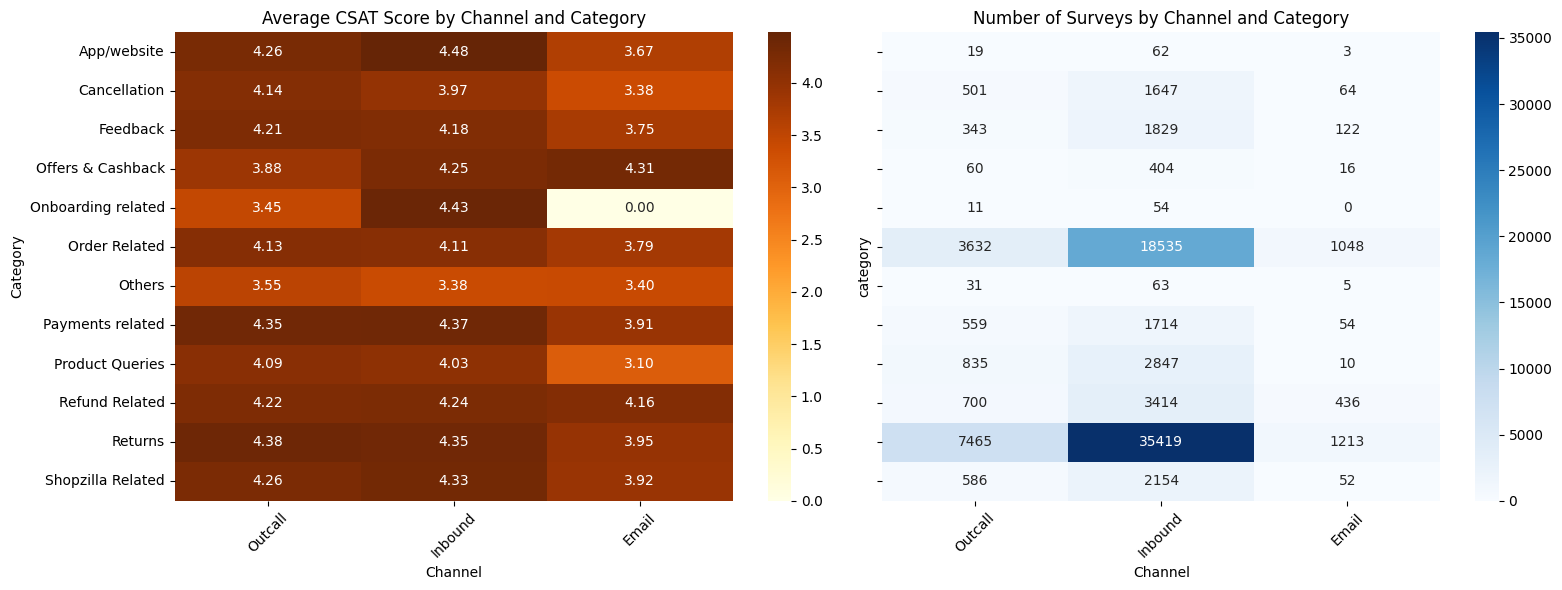

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Share y-axis

# Plot Average CSAT Score by Category and Channel
sns.heatmap(pivot_cat_channel['CSAT'], cmap='YlOrBr', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Average CSAT Score by Channel and Category')
axs[0].set_xlabel('Channel')
axs[0].set_ylabel('Category')
axs[0].tick_params(axis='x', rotation=45)

# Plot Number of Surveys by Category and Channel
sns.heatmap(pivot_cat_channel['category'], cmap='Blues', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Number of Surveys by Channel and Category')
axs[1].set_xlabel('Channel')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

=> **Inbound channel** delivers the best customer satisfaction across various service categories, with notable effectiveness in managing refunds and returns

=> **Product Queries** require more attention across all channels due to lower satisfaction scores

1-8. Channel and Managers

In [ ]:
# Find average CSAT by channel on each Manager
pivot_mngr_channel = data.pivot_table(index='manager', columns='channel', aggfunc={"manager":'size','CSAT': 'mean'},
                                            fill_value=0)

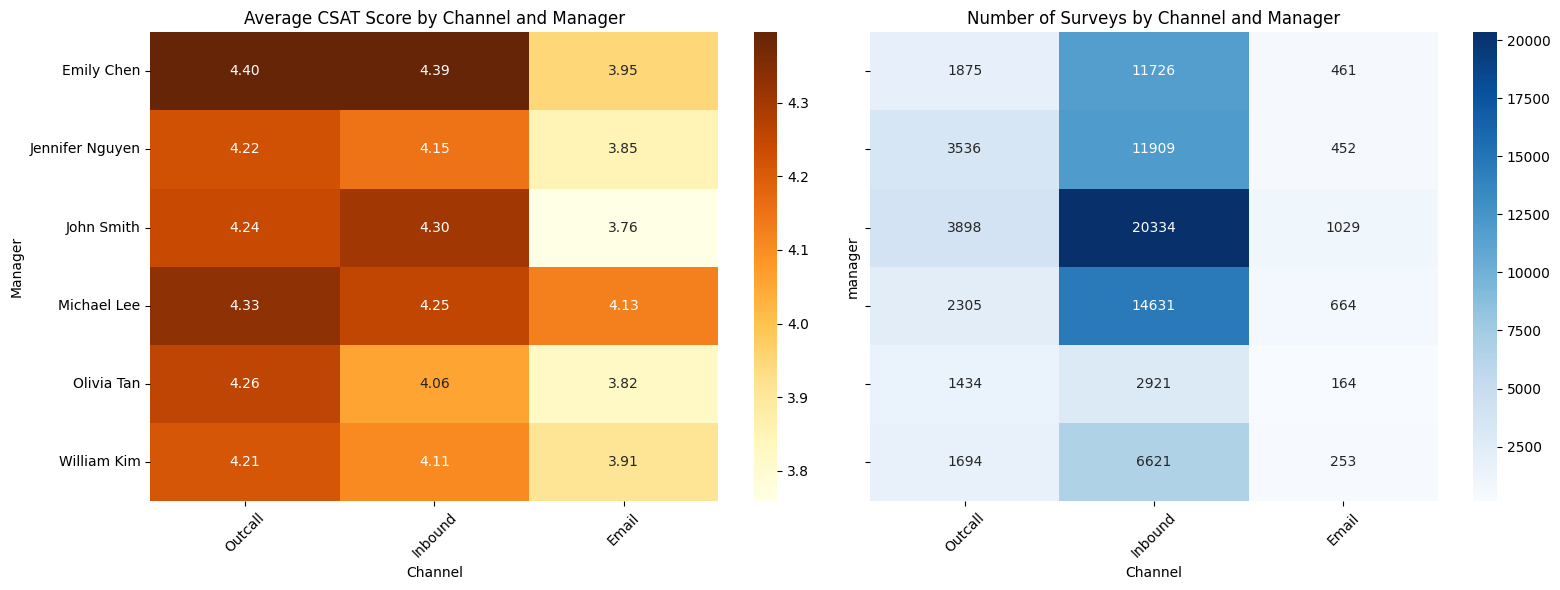

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Share y-axis

# Plot Average CSAT Score by Channel and Manager
sns.heatmap(pivot_mngr_channel['CSAT'], cmap='YlOrBr', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Average CSAT Score by Channel and Manager')
axs[0].set_xlabel('Channel')
axs[0].set_ylabel('Manager')
axs[0].tick_params(axis='x', rotation=45)

# Plot Number of Surveys by Channel and Manager
sns.heatmap(pivot_mngr_channel['manager'], cmap='Blues', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Number of Surveys by Channel and Manager')
axs[1].set_xlabel('Channel')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

=> **Michael Lee stands out with strong performance** across channels, while **all managers show room for improvement in **Email**. The volume of surveys handled by John Smith in Inbound and Outcall suggests effective management of a heavy workload without a significant drop in CSAT scores.

1-4 Channel and Tenure Bucket

In [ ]:
# Find average CSAT by channel on each categories
pivot_bucket_channel = data.pivot_table(index='tenure_bucket', columns='channel', aggfunc={"tenure_bucket":'size','CSAT': 'mean'},
                                            fill_value=0)

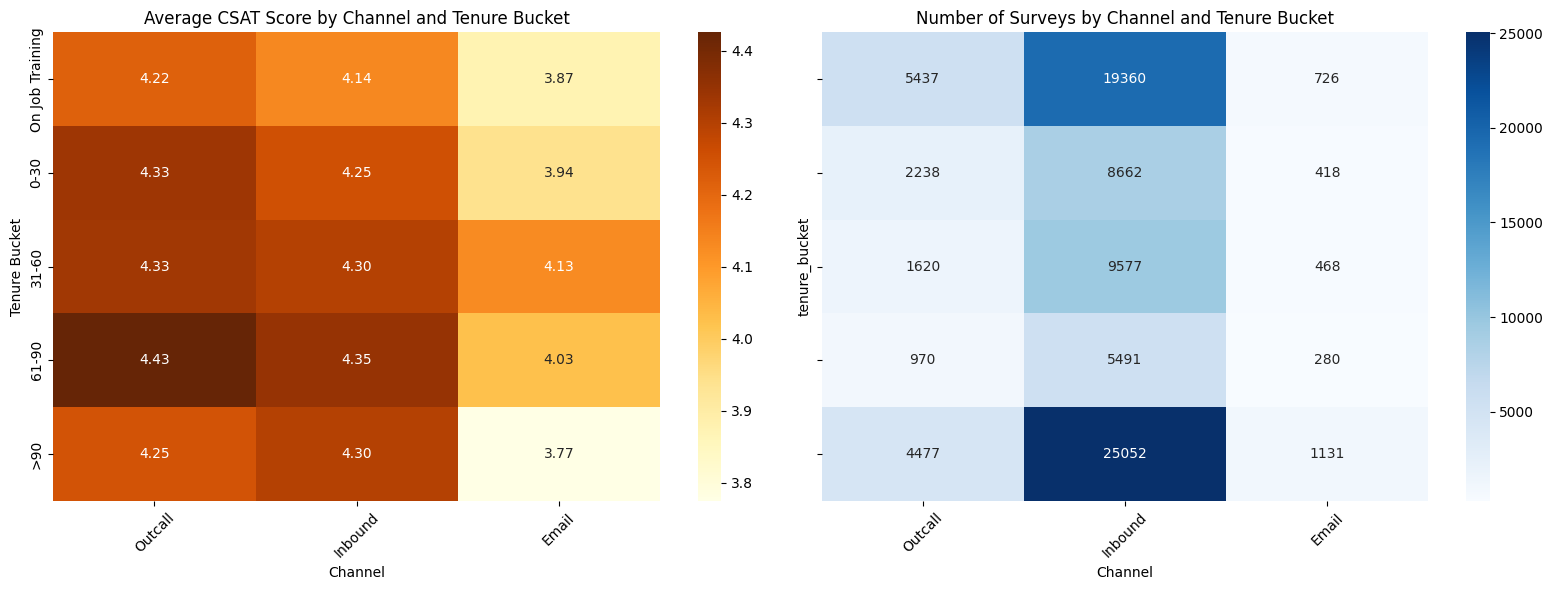

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Share y-axis

# Plot Average CSAT Score by Channel and Tenure Bucket
sns.heatmap(pivot_bucket_channel['CSAT'], cmap='YlOrBr', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Average CSAT Score by Channel and Tenure Bucket')
axs[0].set_xlabel('Channel')
axs[0].set_ylabel('Tenure Bucket')
axs[0].tick_params(axis='x', rotation=45)

# Plot Number of Surveys by Channel and Tenure Bucket
sns.heatmap(pivot_bucket_channel['tenure_bucket'], cmap='Blues', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Number of Surveys by Channel and Tenure Bucket')
axs[1].set_xlabel('Channel')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

=> **The volume of surveys handled increases with agent tenure**, indicating that more experienced agents are entrusted with a greater share of customer interactions. **Outcall** interactions, while less frequent than Inbound, **tend to yield higher satisfaction**, possibly due to the proactive nature of this communication channel.

1-5 Channel and Shift

In [ ]:
# Find average CSAT by channel on each categories
pivot_shift_channel = data.pivot_table(index='shift', columns='channel', aggfunc={"shift":'size','CSAT': 'mean'},
                                            fill_value=0)

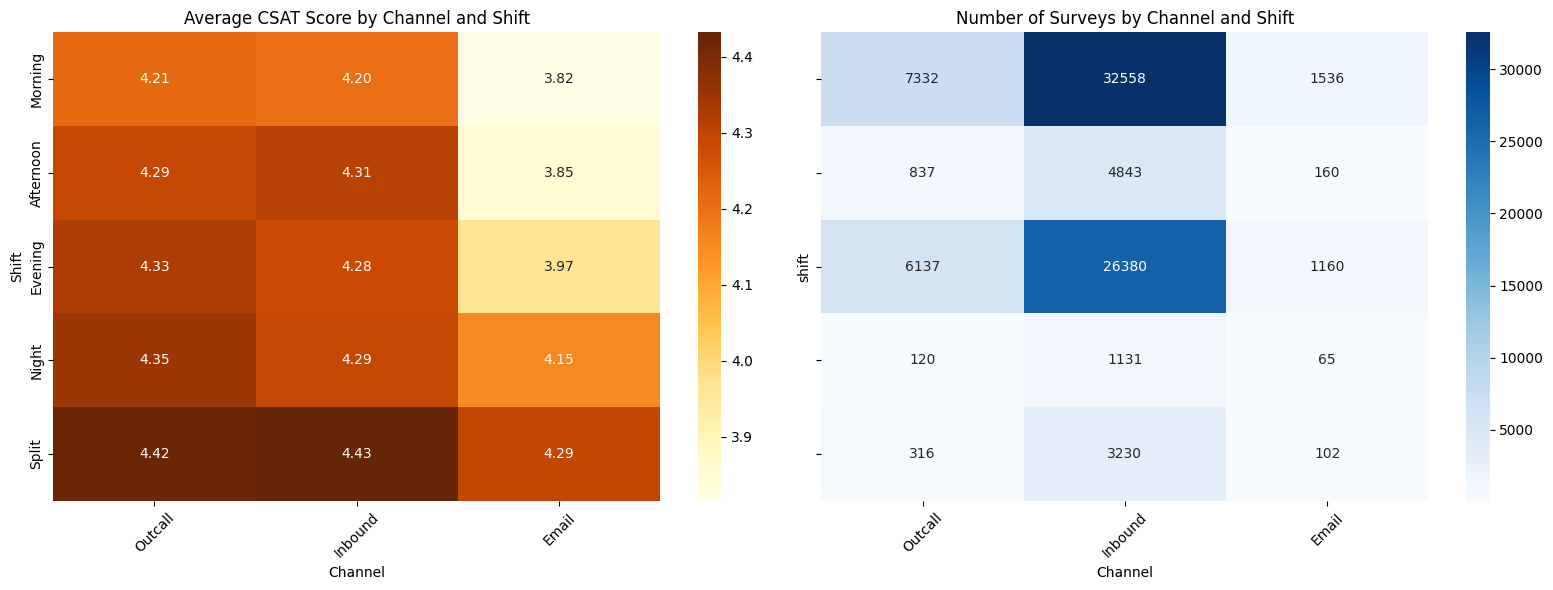

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Share y-axis

# Plot Average CSAT Score by Channel and Shift
sns.heatmap(pivot_shift_channel['CSAT'], cmap='YlOrBr', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Average CSAT Score by Channel and Shift')
axs[0].set_xlabel('Channel')
axs[0].set_ylabel('Shift')
axs[0].tick_params(axis='x', rotation=45)

# Plot Number of Surveys by Channel and Shift
sns.heatmap(pivot_shift_channel['shift'], cmap='Blues', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Number of Surveys by Channel and Shift')
axs[1].set_xlabel('Channel')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

=> The **split shift pattern appears to be highly effective**, resulting in the best CSAT performance, which may be due to flexible work hours catering to peak customer times. Although the Inbound channel carries the heaviest volume of surveys, particularly in the Morning and Evening, it maintains high customer satisfaction levels. This data could inform decisions about optimizing shift schedules and training for specific channels to enhance overall customer satisfaction.

>>>#### **2. by Category and other features**

2-4 Category and Tenure Bucket

In [ ]:
# Find average CSAT by tenure bucket on each categories
pivot_cat_bucket = data.pivot_table(index='category', columns='tenure_bucket', aggfunc={"tenure_bucket":'size','CSAT': 'mean'},
                                            fill_value=0)

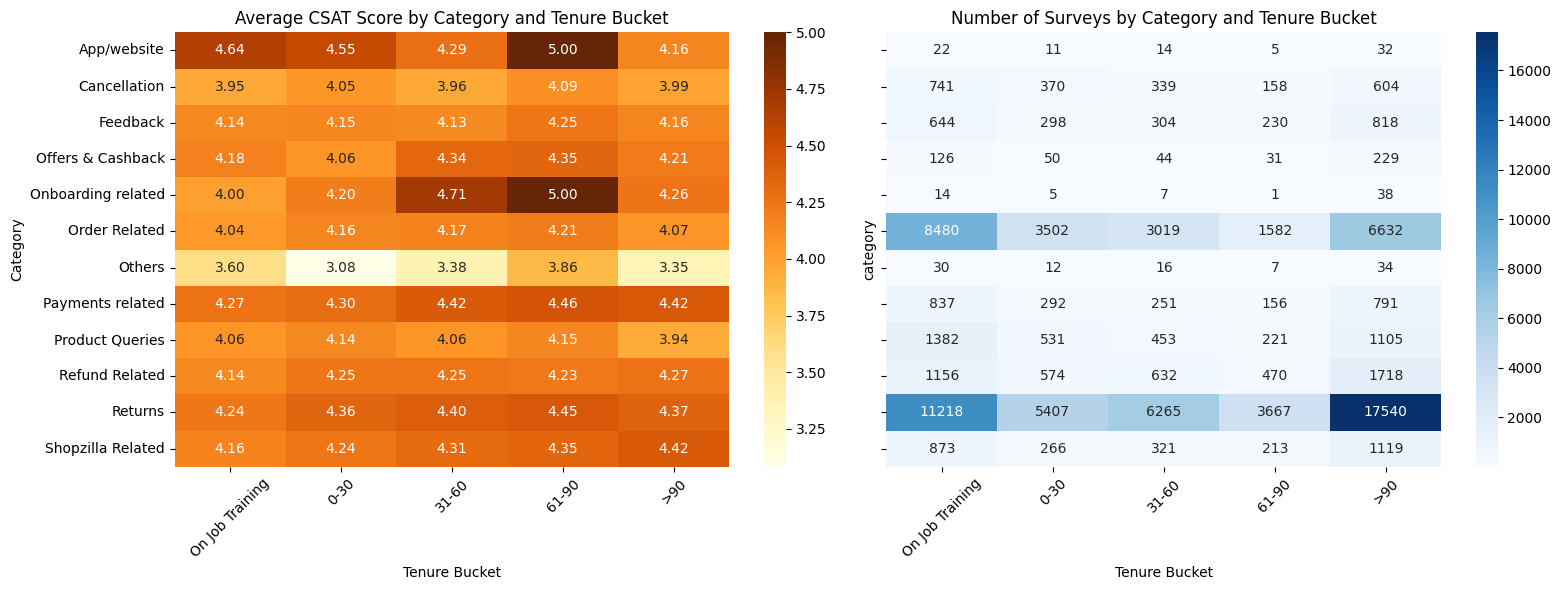

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Share y-axis

# Plot Average CSAT Score by Category and Tenure Bucket
sns.heatmap(pivot_cat_bucket['CSAT'], cmap='YlOrBr', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Average CSAT Score by Category and Tenure Bucket')
axs[0].set_xlabel('Tenure Bucket')
axs[0].set_ylabel('Category')
axs[0].tick_params(axis='x', rotation=45)

# Plot Number of Surveys by Category and Tenure Bucket
sns.heatmap(pivot_cat_bucket['tenure_bucket'], cmap='Blues', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Number of Surveys by Category and Tenure Bucket')
axs[1].set_xlabel('Tenure Bucket')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

=> **Certain categories show room for improvement regardless of agent experience**, and the high volume of Order Related queries reflects the importance of managing these effectively due to their frequency. The data indicates that targeted training for agents early in their tenure, especially in categories with lower satisfaction scores, could enhance overall customer satisfaction.








2-5 Categories and Shift

In [ ]:
# Find average CSAT by Shift on each Categories
pivot_cat_shift = data.pivot_table(index='category', columns='shift', aggfunc={"shift":'size','CSAT': 'mean'},
                                            fill_value=0)

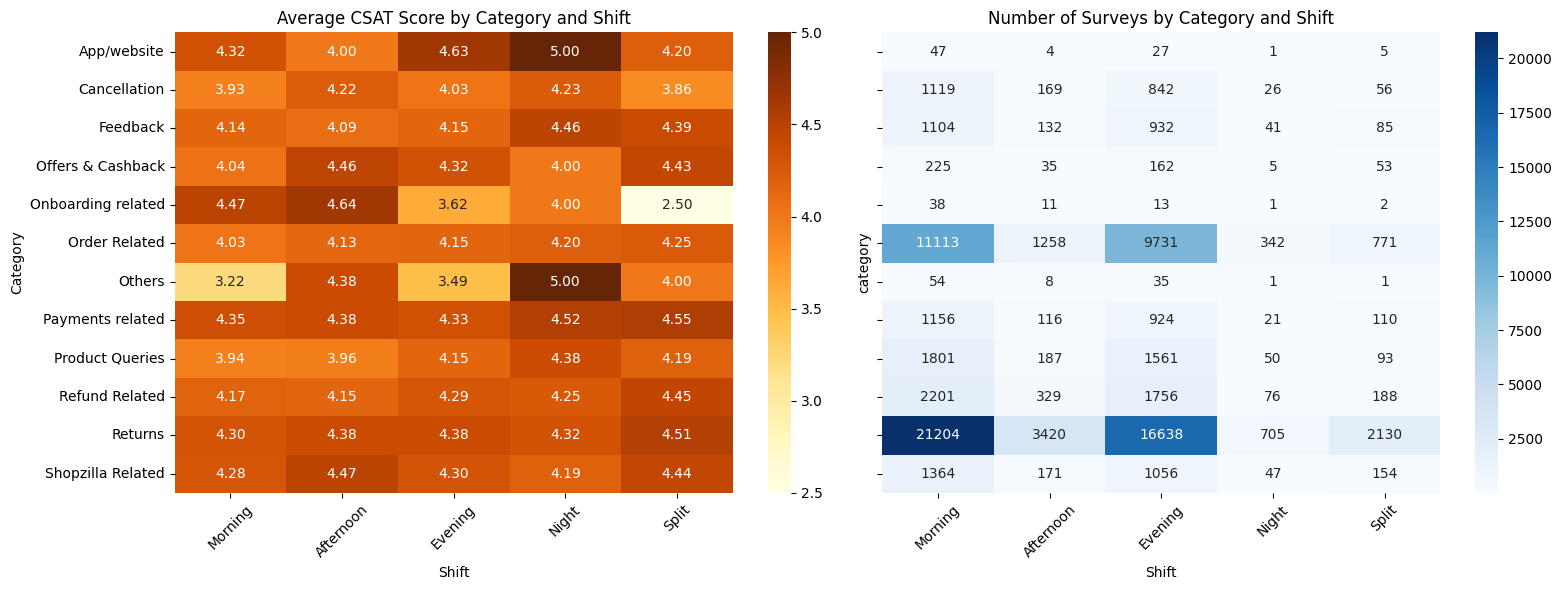

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Share y-axis

# Plot Average CSAT Score by Category and Shift
sns.heatmap(pivot_cat_shift['CSAT'], cmap='YlOrBr', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Average CSAT Score by Category and Shift')
axs[0].set_xlabel('Shift')
axs[0].set_ylabel('Category')
axs[0].tick_params(axis='x', rotation=45)

# Plot Number of Surveys by Category and Shift
sns.heatmap(pivot_cat_shift['shift'], cmap='Blues', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Number of Surveys by Category and Shift')
axs[1].set_xlabel('Shift')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

2-8 Category and Manager

In [ ]:
# Find average CSAT by Category and Supevisor
pivot_cat_mngr = data.pivot_table(index='category', columns='manager', aggfunc={"manager":'size','CSAT': 'mean'},
                                            fill_value=0)

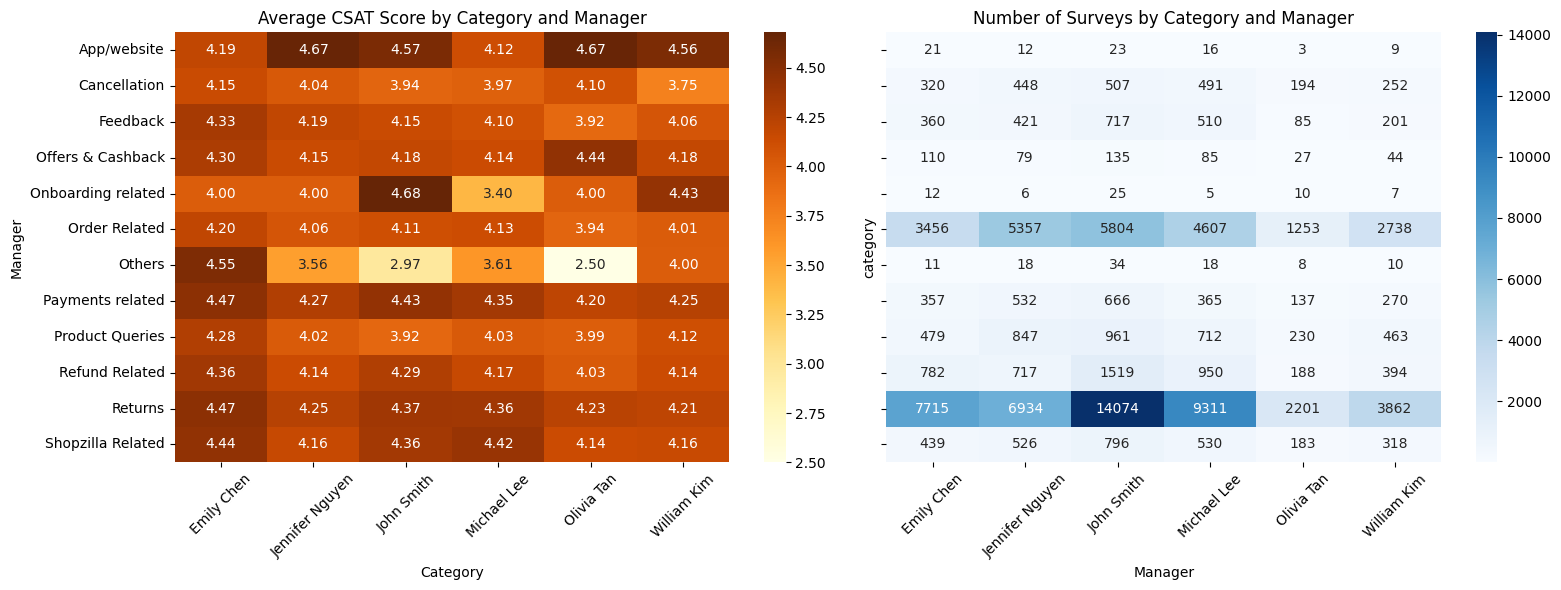

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Share y-axis

# Plot Average CSAT Score by Category and Manager
sns.heatmap(pivot_cat_mngr['CSAT'], cmap='YlOrBr', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Average CSAT Score by Category and Manager')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Manager')
axs[0].tick_params(axis='x', rotation=45)

# Plot Number of Surveys by Category and Manager
sns.heatmap(pivot_cat_mngr['manager'], cmap='Blues', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Number of Surveys by Category and Manager')
axs[1].set_xlabel('Manager')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

=> Michael Lee's strong performance across various categories suggests effective management practices, while the high number of surveys handled by John Smith indicates a broad span of responsibility. There are areas where managers like Jennifer Nguyen and Olivia Tan can improve.

>> #### **3. by Response Time and other features**

3-1 Response Time and Channel

In [ ]:
pivot_time_channel = data.pivot_table(index='respond_time_category', columns='channel',
                                            aggfunc={'channel': 'size', 'CSAT': 'mean'},
                                            fill_value=0)

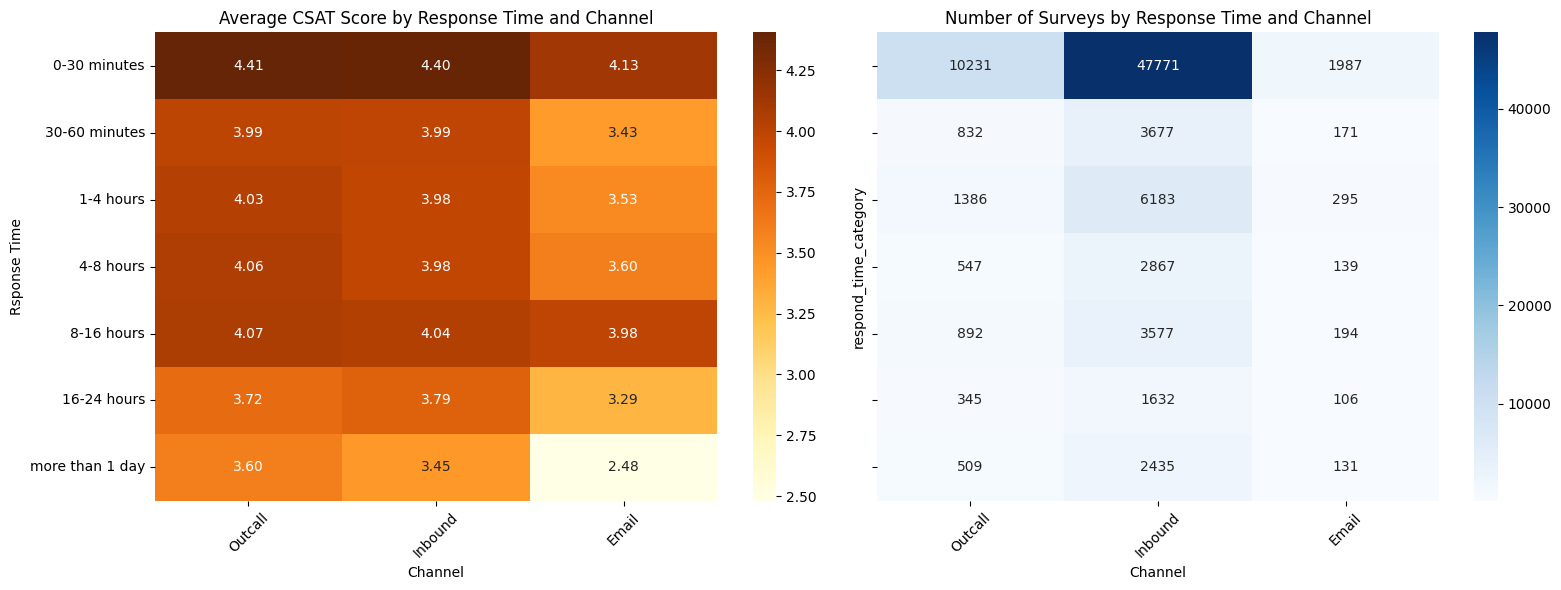

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Share y-axis

# Plot Average CSAT Score by Response Time and Channel
sns.heatmap(pivot_time_channel['CSAT'], cmap='YlOrBr', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Average CSAT Score by Response Time and Channel')
axs[0].set_xlabel('Channel')
axs[0].set_ylabel('Rsponse Time')
axs[0].tick_params(axis='x', rotation=45)

# Plot Number of Surveys by Response Time and Channel
sns.heatmap(pivot_time_channel['channel'], cmap='Blues', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Number of Surveys by Response Time and Channel')
axs[1].set_xlabel('Channel')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

=> **Fastest response times yield highest satisfaction**

3-2 Response Time and Category

In [ ]:
pivot_time_cat = data.pivot_table(index='respond_time_category', columns='category',
                                            aggfunc={'category': 'size', 'CSAT': 'mean'},
                                            fill_value=0)

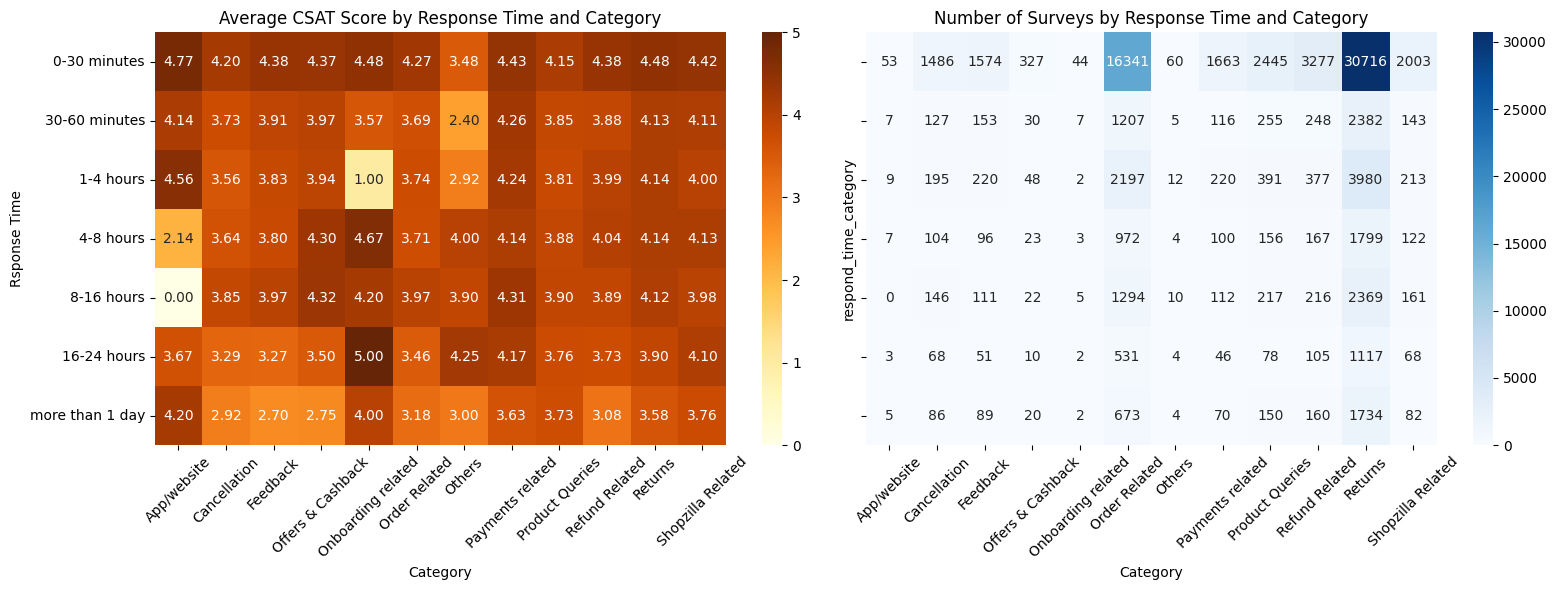

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Share y-axis

# Plot Average CSAT Score by Response Time and Category
sns.heatmap(pivot_time_cat['CSAT'], cmap='YlOrBr', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Average CSAT Score by Response Time and Category')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Rsponse Time')
axs[0].tick_params(axis='x', rotation=45)

# Plot Number of Surveys by Response Time and Category
sns.heatmap(pivot_time_cat['category'], cmap='Blues', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Number of Surveys by Response Time and Category')
axs[1].set_xlabel('Category')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

=> **Impact of Response Times on CSAT:** The sub-categories with quicker resolution times, such as 'Non Order related' and 'Payment pending', show almost perfect satisfaction rates, emphasizing the importance of rapid response to customer inquiries and problems. Conversely, longer resolution times in categories like 'Unable to Login' and 'Commission related' show significantly lower satisfaction, underscoring the negative impact of delays on customer perception and satisfaction.
For certain categories like 'Order Related', customers might perceive the quality of the resolution to be more important than the speed of response, as evidenced by high CSAT scores even at longer response times. The 'App/website' category shows unique patterns that could be influenced by the complexity of issues or customer expectations around technological support. High volumes of surveys are being managed efficiently within the shortest response time window, emphasizing the emphasis on rapid service delivery in customer service operations.

3-4 Response Time and Tenure Bucket

In [ ]:
pivot_time_tb = data.pivot_table(index='respond_time_category', columns='tenure_bucket',
                                            aggfunc={'tenure_bucket': 'size', 'CSAT': 'mean'},
                                            fill_value=0)

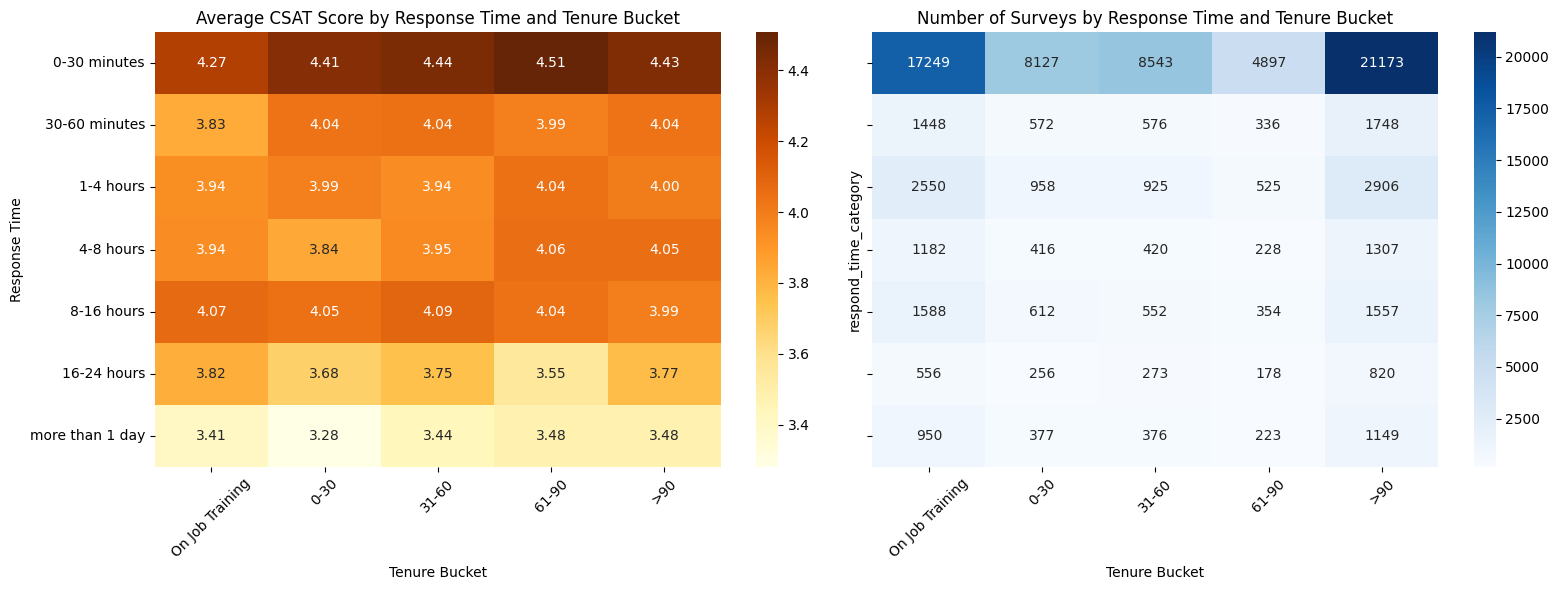

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Share y-axis

# Plot Average CSAT Score by Response Time and Tenure Bucket
sns.heatmap(pivot_time_tb['CSAT'], cmap='YlOrBr', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Average CSAT Score by Response Time and Tenure Bucket')
axs[0].set_xlabel('Tenure Bucket')
axs[0].set_ylabel('Response Time')
axs[0].tick_params(axis='x', rotation=45)

# Plot Number of Surveys by Response Time and Tenure Bucket
sns.heatmap(pivot_time_tb['tenure_bucket'], cmap='Blues', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Number of Surveys by Response Time and Tenure Bucket')
axs[1].set_xlabel('Tenure Bucket')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

=> There is **potential for improving the response times for agents who are new** to the company. These insights can help tailor training programs for new agents and optimize workflows to ensure customers receive timely support, thereby improving overall satisfaction.


3-5 Response Time and Shift

In [ ]:
pivot_time_shift = data.pivot_table(index='respond_time_category', columns='shift',
                                            aggfunc={'shift': 'size', 'CSAT': 'mean'},
                                            fill_value=0)

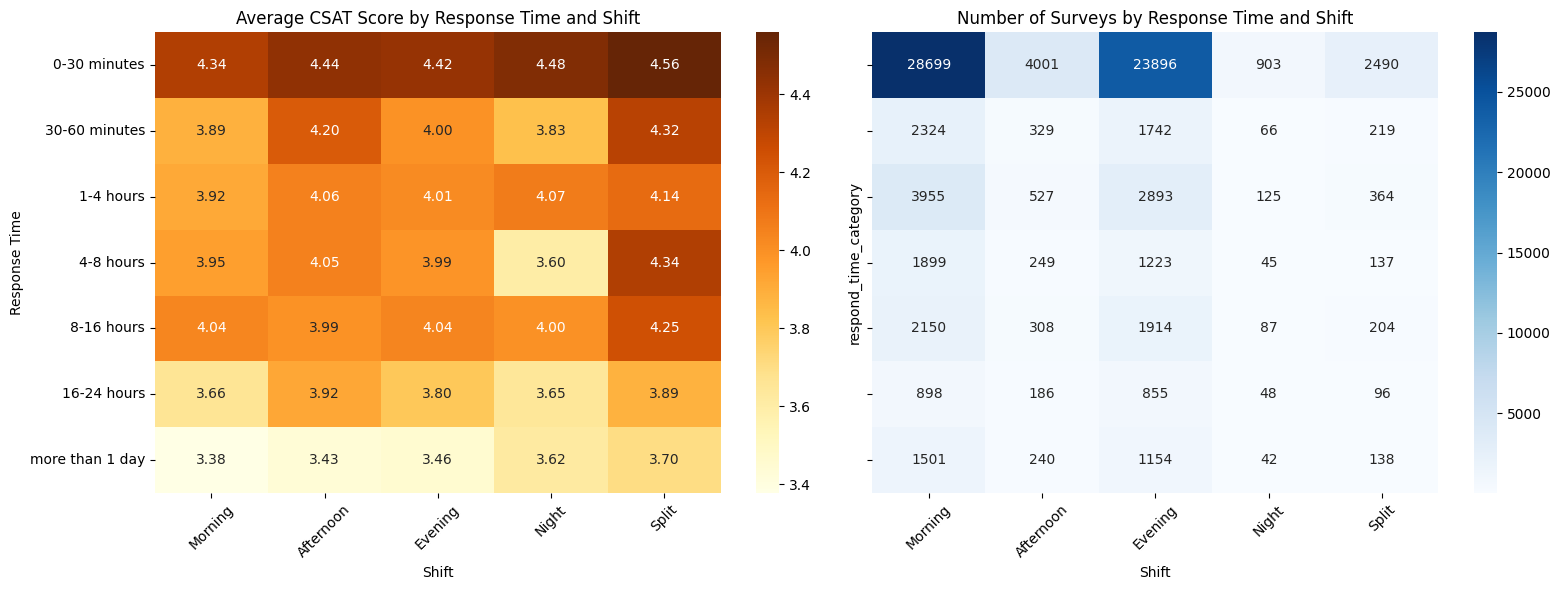

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Share y-axis

# Plot Average CSAT Score by Response Time and Shift
sns.heatmap(pivot_time_shift['CSAT'], cmap='YlOrBr', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Average CSAT Score by Response Time and Shift')
axs[0].set_xlabel('Shift')
axs[0].set_ylabel('Response Time')
axs[0].tick_params(axis='x', rotation=45)

# Plot Number of Surveys by Response Time and Shift
sns.heatmap(pivot_time_shift['shift'], cmap='Blues', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Number of Surveys by Response Time and Shift')
axs[1].set_xlabel('Shift')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

=> Agents working during **off-peak hours (Night and Split shifts) seem to be particularly effective**, possibly due to lower query volumes and therefore more personalized attention. The Evening shift appears to be the busiest, suggesting that resource allocation during this period should be optimized to maintain high customer satisfaction.

3-8 Response Time and Team

In [ ]:
pivot_time_mngr = data.pivot_table(index='respond_time_category', columns='manager',
                                            aggfunc={'manager': 'size', 'CSAT': 'mean'},
                                            fill_value=0)

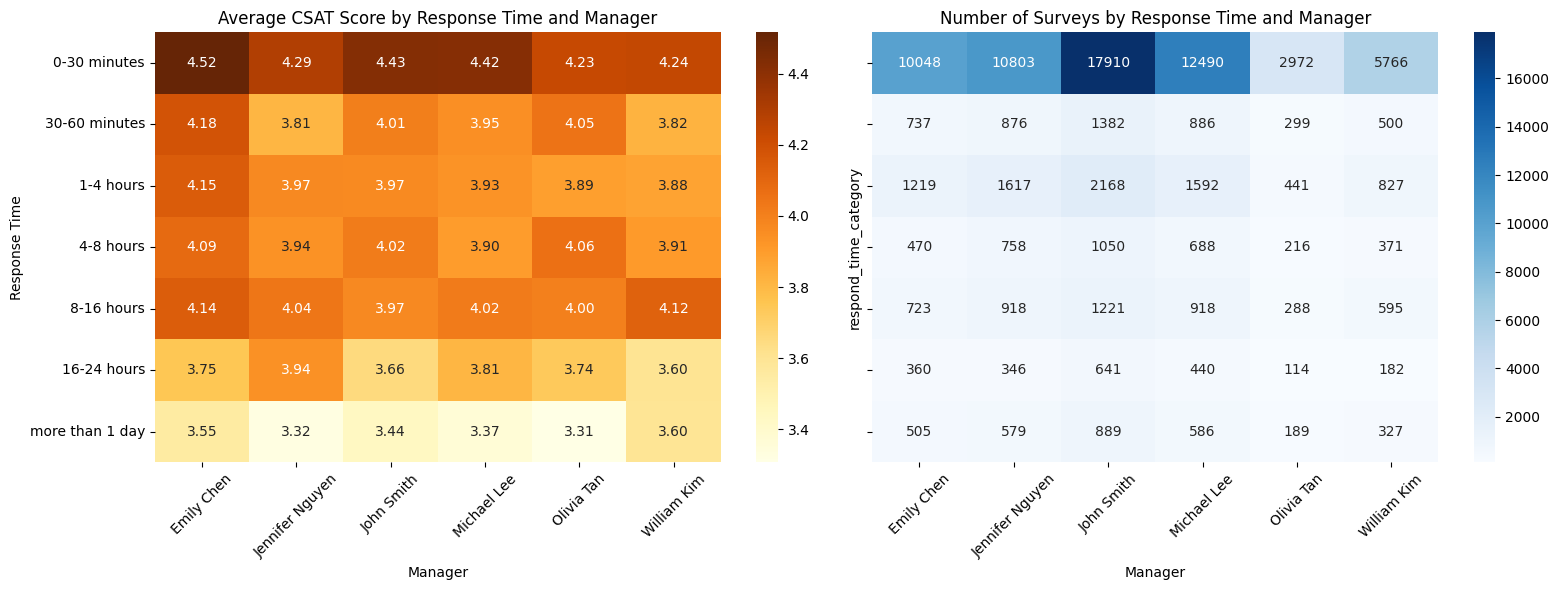

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Share y-axis

# Plot Average CSAT Score by Response Time and Manager
sns.heatmap(pivot_time_mngr['CSAT'], cmap='YlOrBr', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Average CSAT Score by Response Time and Manager')
axs[0].set_xlabel('Manager')
axs[0].set_ylabel('Response Time')
axs[0].tick_params(axis='x', rotation=45)

# Plot Number of Surveys by Response Time and Manager
sns.heatmap(pivot_time_mngr['manager'], cmap='Blues', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Number of Surveys by Response Time and Manager')
axs[1].set_xlabel('Manager')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

=> Once again confirming that quick response brings high customer satisfaction, this is equally expressed across teams.
Besides, **the team managing best in the response time and CSAT score is Emily Chen's team**

>> #### **4. by Tenure Bucket and other features**

4-5 Tenure Bucket and Shift

In [ ]:
pivot_tb_shift = data.pivot_table(index='tenure_bucket', columns='shift',
                                            aggfunc={'shift': 'size', 'CSAT': 'mean'},
                                            fill_value=0)

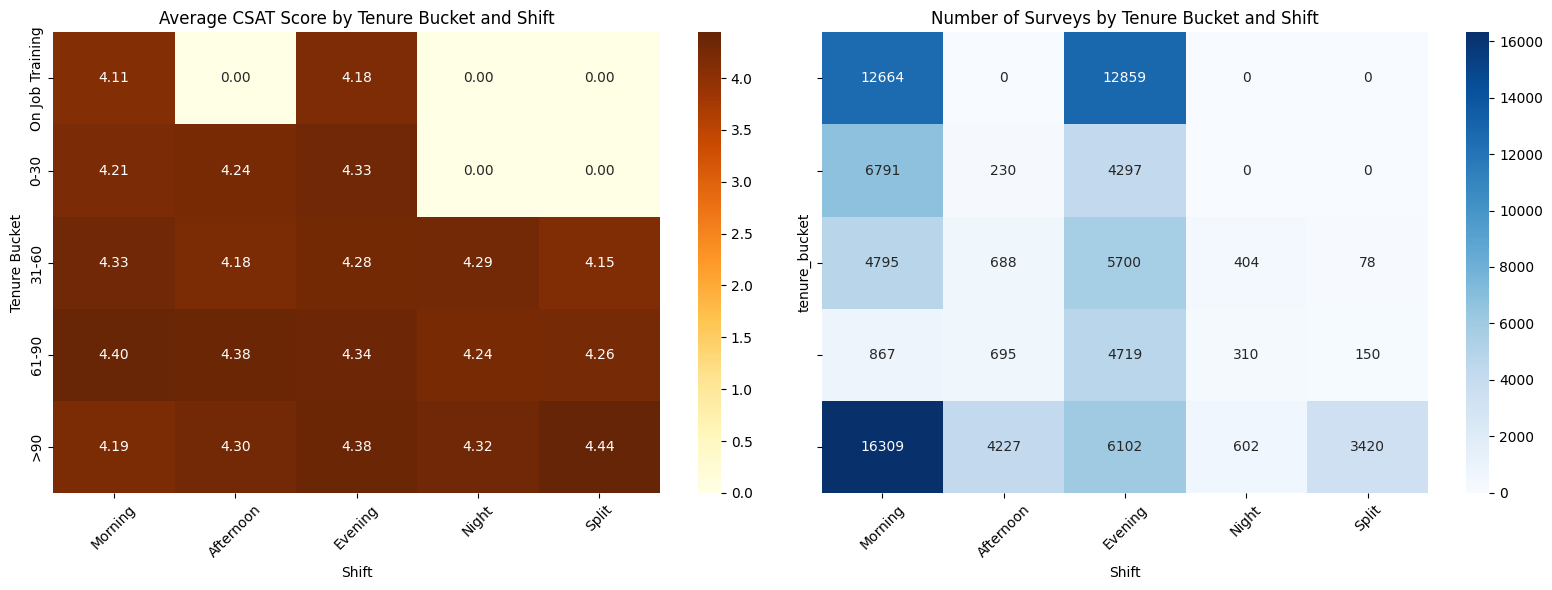

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Share y-axis

# Plot Average CSAT Score by Tenure Bucket and Shift
sns.heatmap(pivot_tb_shift['CSAT'], cmap='YlOrBr', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Average CSAT Score by Tenure Bucket and Shift')
axs[0].set_xlabel('Shift')
axs[0].set_ylabel('Tenure Bucket')
axs[0].tick_params(axis='x', rotation=45)

# Plot Number of Surveys by Response Time and Manager
sns.heatmap(pivot_tb_shift['shift'], cmap='Blues', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Number of Surveys by Tenure Bucket and Shift')
axs[1].set_xlabel('Shift')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

=> All agents in training works only in Morning and Evening. This should be reallocate because the company receives lots of queries this shift and training agents cannot cover.

=> New agents with 0-30 days works in Morning, Afternoon and Evening.

>> #### **5. by Workforce and other features**

6-5 Agent and Shift

In [ ]:
agent_tenure_counts = data.pivot_table(index='tenure_bucket', columns='shift', values='agent_name', aggfunc='nunique', fill_value=0)
agent_tenure_counts

shift            Morning  Afternoon  Evening  Night  Split
tenure_bucket                                             
On Job Training      261          0      257      0      0
0-30                  83          6       50      0      0
31-60                 62         12       67      5      2
61-90                 11         10       63      4      2
>90                  253         68       89      9     57

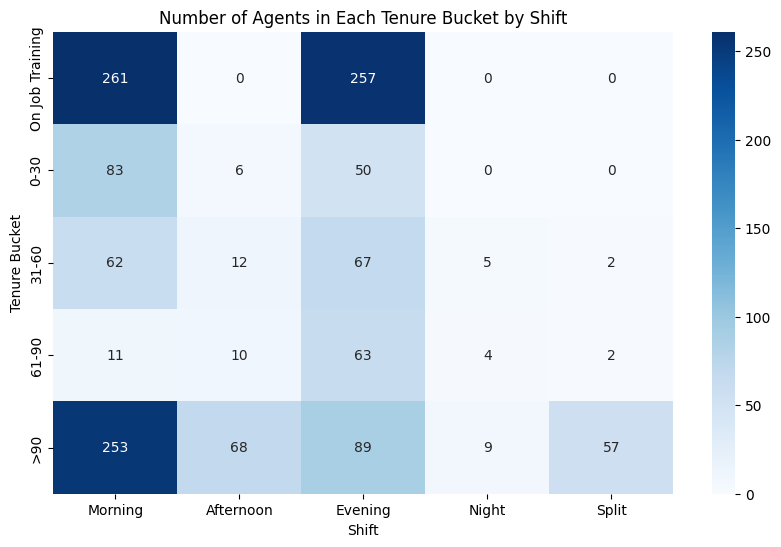

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(agent_tenure_counts, annot=True, fmt='d', cmap='Blues', cbar=True)

# Add labels and title
plt.title('Number of Agents in Each Tenure Bucket by Shift')
plt.xlabel('Shift')
plt.ylabel('Tenure Bucket')

# Show the plot
plt.show()

- The number of agents allocated is consistent with the number of surveys for each shift

In [ ]:
agent_shift_surveys = data.groupby(['shift'])['CSAT'].count().reset_index()
unique_agents_per_shift = data.groupby(['shift'])['agent_name'].nunique().reset_index()

avg_surveys_agent_shift = pd.merge(agent_shift_surveys, unique_agents_per_shift, on='shift')

avg_surveys_agent_shift.rename(columns={'CSAT': 'no_of_surveys', 'agent_name': 'no_of_agent_per_shift',}, inplace=True)

# Calculate the average number of surveys for each agent in each shift
avg_surveys_agent_shift['avg_surveys_per_agent'] = avg_surveys_agent_shift['no_of_surveys'] / avg_surveys_agent_shift['no_of_agent_per_shift']


# Display the resulting DataFrame
print(avg_surveys_agent_shift)

       shift  no_of_surveys  no_of_agent_per_shift  avg_surveys_per_agent
0    Morning          41426                    670              61.829851
1  Afternoon           5840                     96              60.833333
2    Evening          33677                    526              64.024715
3      Night           1316                     18              73.111111
4      Split           3648                     61              59.803279


8-4 Manager and Tenure Bucket

In [ ]:
pivot_mngr_tenure_bucket = data.pivot_table(index='manager', columns='tenure_bucket',
                                            aggfunc={'tenure_bucket': 'size', 'CSAT': 'mean'},
                                            fill_value=0)

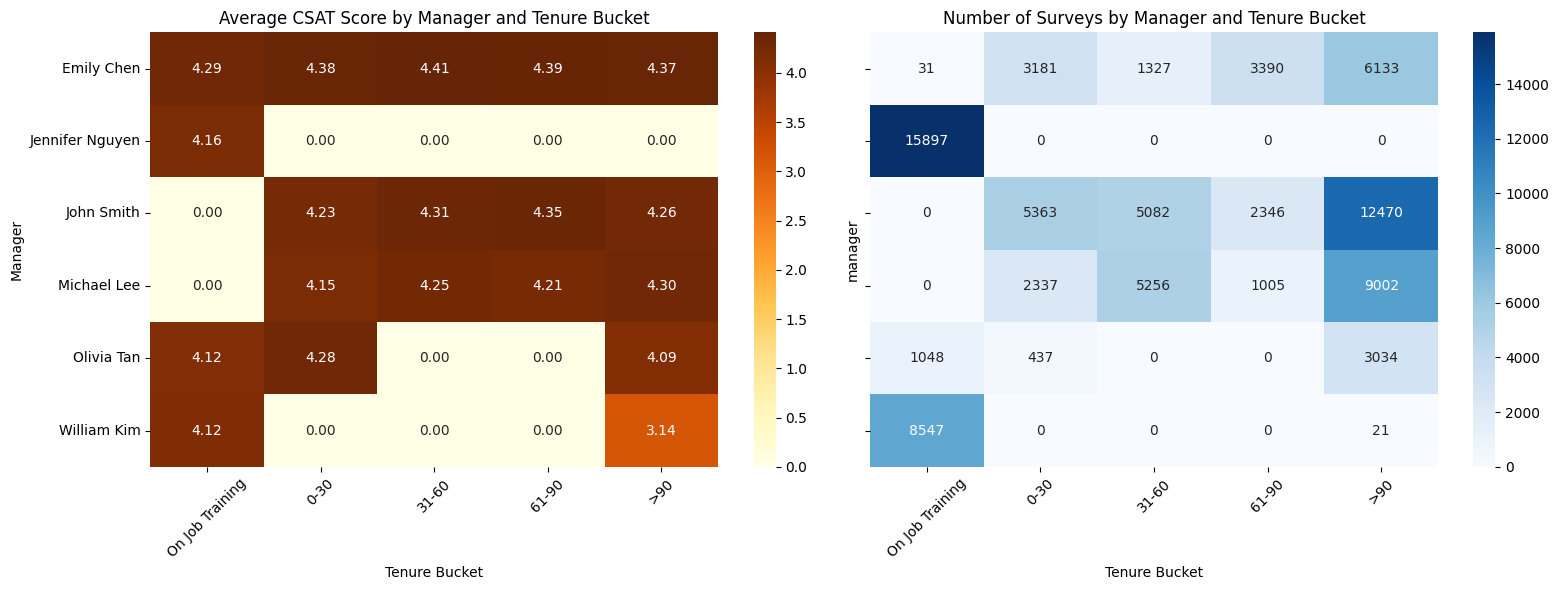

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Share y-axis

# Plot Average CSAT Score by Manager and Tenure Bucket
sns.heatmap(pivot_mngr_tenure_bucket['CSAT'], cmap='YlOrBr', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Average CSAT Score by Manager and Tenure Bucket')
axs[0].set_xlabel('Tenure Bucket')
axs[0].set_ylabel('Manager')
axs[0].tick_params(axis='x', rotation=45)

# Plot Number of Surveys by Manager and Tenure Bucket
sns.heatmap(pivot_mngr_tenure_bucket['tenure_bucket'], cmap='Blues', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Number of Surveys by Manager and Tenure Bucket')
axs[1].set_xlabel('Tenure Bucket')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

=> Emily Chen manages all 5 groups of tenure bucket. While Jennifer Nguyen works only with trainee. This somewhat affects the overall results if the entire team is trainees.

=> Agents of > 90 days working mananged by William Kim has worst performance even the number of survey is small. This group need to be paid attention to find out the root reason for not good performance.

>## **Performance Evaluation**

Agent Performance Evaluation

If CSAT is key matric for customer satisfaction evaluation, for employees performance, we need to include workload (number of surveys) and response time for the effective evaluation.

I use Normalization Method for agent performance evaluation.

In [ ]:
# Calculate mean CSAT, count of surveys, and mode of response time category for each agent
agent_performance = data.groupby('agent_name').agg({
    'CSAT': 'mean',  # Mean CSAT score per agent
    'respond_time_minutes': 'mean',  # Mean response time in minutes
    'CSAT': 'count'  # Count of surveys handled
}).reset_index()

# You might also want to see the most common response time category
most_common_response_time_agent = data.groupby('agent_name')['respond_time_category'].agg(lambda x: x.mode()[0]).reset_index()
agent_performance = pd.merge(agent_performance, most_common_response_time_agent, on='agent_name')

In [ ]:
# Normalize the metrics for comparison (simple feature scaling)
agent_performance['CSAT_normalized'] = (agent_performance['CSAT'] - agent_performance['CSAT'].min()) / (agent_performance['CSAT'].max() - agent_performance['CSAT'].min())
agent_performance['respond_time_normalized'] = 1 - ((agent_performance['respond_time_minutes'] - agent_performance['respond_time_minutes'].min()) / (agent_performance['respond_time_minutes'].max() - agent_performance['respond_time_minutes'].min()))
agent_performance['surveys_normalized'] = (agent_performance['CSAT'] - agent_performance['CSAT'].min()) / (agent_performance['CSAT'].max() - agent_performance['CSAT'].min())

# Create a composite score by averaging the normalized scores
agent_performance['performance_score'] = (agent_performance['CSAT_normalized'] + agent_performance['respond_time_normalized'] + agent_performance['surveys_normalized']) / 3

# Sort managers by the composite score
top_agent = agent_performance.sort_values(by='performance_score', ascending=False)

In [ ]:
print(top_agent[['agent_name', 'performance_score', 'respond_time_category']])

               agent_name  performance_score respond_time_category
1347         Wendy Taylor           0.937447          0-30 minutes
324           David Smith           0.672556          0-30 minutes
1288         Timothy Huff           0.662454          0-30 minutes
503           Jamie Smith           0.624893          0-30 minutes
970   Mrs. Jennifer Stone           0.568574          0-30 minutes
...                   ...                ...                   ...
1339   Virginia Mccormick           0.082013          0-30 minutes
1170       Shane Humphrey           0.077001          0-30 minutes
393        Elizabeth Rose           0.061840          0-30 minutes
51               Amy Bell           0.052037          0-30 minutes
227      Christine Castro           0.013040          0-30 minutes

[1371 rows x 3 columns]


Manager Performance Evaluation

In [ ]:
# Calculate mean CSAT, count of surveys, and mode of response time category for each manager
manager_performance = data.groupby('manager').agg({
    'CSAT': 'mean',  # Mean CSAT score per manager
    'respond_time_minutes': 'mean',  # Mean response time in minutes
    'CSAT_class': 'count'  # Count of surveys handled (assuming CSAT_class is filled for every survey)
}).reset_index()

# You might also want to see the most common response time category
most_common_response_time = data.groupby('manager')['respond_time_category'].agg(lambda x: x.mode()[0]).reset_index()
manager_performance = pd.merge(manager_performance, most_common_response_time, on='manager')
manager_performance

manager      CSAT  respond_time_minutes  CSAT_class  \
0       Emily Chen  4.379107            193.349195       14062   
1  Jennifer Nguyen  4.158583            197.808750       15897   
2       John Smith  4.270694            188.281911       25261   
3      Michael Lee  4.259602            185.517450       17600   
4       Olivia Tan  4.112193            225.820038        4519   
5      William Kim  4.121032            204.780810        8568   

  respond_time_category  
0          0-30 minutes  
1          0-30 minutes  
2          0-30 minutes  
3          0-30 minutes  
4          0-30 minutes  
5          0-30 minutes

In [ ]:
# Normalize the metrics for comparison (simple feature scaling)
manager_performance['CSAT_normalized'] = (manager_performance['CSAT'] - manager_performance['CSAT'].min()) / (manager_performance['CSAT'].max() - manager_performance['CSAT'].min())
manager_performance['respond_time_normalized'] = 1 - ((manager_performance['respond_time_minutes'] - manager_performance['respond_time_minutes'].min()) / (manager_performance['respond_time_minutes'].max() - manager_performance['respond_time_minutes'].min()))
manager_performance['surveys_normalized'] = (manager_performance['CSAT_class'] - manager_performance['CSAT_class'].min()) / (manager_performance['CSAT_class'].max() - manager_performance['CSAT_class'].min())

# Create a composite score by averaging the normalized scores
manager_performance['performance_score'] = (manager_performance['CSAT_normalized'] + manager_performance['respond_time_normalized'] + manager_performance['surveys_normalized']) / 3

# Sort managers by the composite score
top_managers = manager_performance.sort_values(by='performance_score', ascending=False)


In [ ]:
print(top_managers[['manager', 'performance_score', 'respond_time_category']])

           manager  performance_score respond_time_category
2       John Smith           0.841745          0-30 minutes
0       Emily Chen           0.755252          0-30 minutes
3      Michael Lee           0.727642          0-30 minutes
1  Jennifer Nguyen           0.472459          0-30 minutes
5      William Kim           0.250118          0-30 minutes
4       Olivia Tan           0.000000          0-30 minutes


In [ ]:
# Top 5 CS agents having best performance
top_5_agent = top_agent.values[:5,0]
top_5_agent

array(['Wendy Taylor', 'David Smith', 'Timothy Huff', 'Jamie Smith',
       'Mrs. Jennifer Stone'], dtype=object)

In [ ]:
# Top 5 CS agents having lowest performance
worst_5_agent = top_agent.values[-5:,0]
worst_5_agent

array(['Virginia Mccormick', 'Shane Humphrey', 'Elizabeth Rose',
       'Amy Bell', 'Christine Castro'], dtype=object)

In [ ]:
# Extract data of top 5 agents, who has the highest CSAT averages
data_top_5_agent = data[data["agent_name"].isin(top_5_agent)]

In [ ]:
data_top_5_agent.groupby("manager")["agent_name"].unique()

manager
John Smith     [David Smith, Timothy Huff, Jamie Smith]
Michael Lee         [Wendy Taylor, Mrs. Jennifer Stone]
Name: agent_name, dtype: object

In [ ]:
# Extract data of worst 5 agents, who has the lowest CSAT averages
data_worst_5_agent = data[data["agent_name"].isin(worst_5_agent)]

In [ ]:
data_worst_5_agent.groupby("manager")["agent_name"].unique()

manager
Jennifer Nguyen                           [Shane Humphrey, Amy Bell]
John Smith         [Virginia Mccormick, Elizabeth Rose, Christine...
Name: agent_name, dtype: object

Finding gap for improvement

In [ ]:
# Add a new column to each DataFrame to indicate whether the agent is in top 5 or worst 5
data_top_5_agent['agent_group'] = 'Top 5'
data_worst_5_agent['agent_group'] = 'Worst 5'

# Concatenate the two DataFrames
merged_data = pd.concat([data_top_5_agent, data_worst_5_agent], ignore_index=True)
merged_data

channel       category              sub_category           agent_name  \
0     Inbound        Returns                   Missing          David Smith   
1     Inbound        Returns           Fraudulent User         Wendy Taylor   
2     Inbound  Order Related                   Delayed  Mrs. Jennifer Stone   
3     Inbound        Returns    Reverse Pickup Enquiry          David Smith   
4     Inbound        Returns            Return request         Timothy Huff   
...       ...            ...                       ...                  ...   
1533  Outcall        Returns                   Missing     Christine Castro   
1534  Inbound        Returns    Reverse Pickup Enquiry       Shane Humphrey   
1535  Inbound        Returns                     Wrong       Shane Humphrey   
1536  Inbound       Feedback  UnProfessional Behaviour             Amy Bell   
1537  Inbound        Returns            Return request       Shane Humphrey   

        supervisor          manager    tenure_bucket    shift  CSAT  \
0     Nathan Patel       John Smith              >90    Split     5   
1      Madison Kim      Michael Lee            31-60  Evening     5   
2        Dylan Kim      Michael Lee              >90  Morning     1   
3     Nathan Patel       John Smith              >90    Split     5   
4      Aiden Patel       John Smith              >90  Morning     5   
...            ...              ...              ...      ...   ...   
1533  Zoe Yamamoto       John Smith              >90  Morning     5   
1534  Mia Yamamoto  Jennifer Nguyen  On Job Training  Morning     5   
1535  Mia Yamamoto  Jennifer Nguyen  On Job Training  Morning     5   
1536     Wyatt Kim  Jennifer Nguyen  On Job Training  Evening     5   
1537  Mia Yamamoto  Jennifer Nguyen  On Job Training  Morning     5   

      respond_time_minutes CSAT_class respond_time_category agent_group  
0                      4.0   Positive          0-30 minutes       Top 5  
1                      1.0   Positive          0-30 minutes       Top 5  
2                      5.0   Negative          0-30 minutes       Top 5  
3                      0.0   Positive          0-30 minutes       Top 5  
4                      3.0   Positive          0-30 minutes       Top 5  
...                    ...        ...                   ...         ...  
1533                   3.0   Positive          0-30 minutes     Worst 5  
1534                   1.0   Positive          0-30 minutes     Worst 5  
1535                   1.0   Positive          0-30 minutes     Worst 5  
1536                   4.0   Positive          0-30 minutes     Worst 5  
1537                   5.0   Positive          0-30 minutes     Worst 5  

[1538 rows x 13 columns]

In [ ]:
# Drop irrelevent columns and columns which we already analize previously
merged_data.drop(columns=['channel', 'category', 'sub_category', 'tenure_bucket', 'shift'], inplace=True)
merged_data.columns

Index(['agent_name', 'supervisor', 'manager', 'CSAT', 'respond_time_minutes',
       'CSAT_class', 'respond_time_category', 'agent_group'],
      dtype='object')

In [ ]:
# grouped_data_topandworst = merged_data.groupby(['agent_name', 'supervisor', 'manager'])

# # Calculate number of surveys, average score, and response time for each group
# grouped_data_topandworst = grouped_data_topandworst.agg({'CSAT': ['mean', 'count'], 'respond_time_minutes': 'mean'})
# grouped_data_topandworst.columns = ['CSAT_mean', 'Survey_Count', 'Respond_Time_Mean']
# grouped_data_topandworst = grouped_data_topandworst.reset_index()

# # Visualize correlation between the metrics
# sns.pairplot(grouped_data_topandworst)
# plt.show()

In [ ]:
# Group data by 'manager' and calculate average respond time
merged_data_time_workload = merged_data.groupby('agent_group').agg({'respond_time_minutes': 'mean', 'CSAT': 'count'}).reset_index()
merged_data_time_workload

agent_group  respond_time_minutes  CSAT
0       Top 5            159.772632  1411
1     Worst 5            632.408399   127

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar plot for average response time
fig.add_trace(
    go.Bar(x=merged_data_time_workload['agent_group'],
           y=merged_data_time_workload['respond_time_minutes'],
           name='Average Response Time (Minutes)',
          #  text=merged_data_time_workload['respond_time_minutes'].round(2),  # Display the text on the bar
           textposition='auto',  # Position the text inside the bars
           marker_color='rgb(173, 132, 198)'),
    secondary_y=False,
)

# Add line plot for survey count
fig.add_trace(
    go.Scatter(x=merged_data_time_workload['agent_group'],
               y=merged_data_time_workload['CSAT'],
               name='Survey Count',
              #  text=merged_data_time_workload['CSAT'],  # Display the text on the points
               mode='lines+markers+text',  # Define the mode to have lines, markers, and text
               textposition='top center',  # Position the text above the points
               marker_color='salmon'),
    secondary_y=True,
)

# Set x-axis title
fig.update_xaxes(title_text="Agent Group")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Primary</b> Average Respond Time", secondary_y=False)
fig.update_yaxes(title_text="<b>Secondary</b> Survey Count", secondary_y=True)

# Add figure title
fig.update_layout(
    title_text="Average Response Time and Survey Count by Agent Group",
    legend=dict(x=0.01, y=0.99, traceorder="normal", bgcolor='rgba(255,255,255,0)'),
    template='plotly_white'
)

# Show the figure
fig.show()

Finding differences of CSAT distribution between both groups

In [ ]:
csat_class_counts = merged_data.groupby(['agent_group', "CSAT_class"]).size().unstack(fill_value=0)
csat_class_counts

CSAT_class   Negative  Positive
agent_group                    
Top 5             202      1209
Worst 5            63        64

In [ ]:
# Initialize subplot with shared y-axis
fig = make_subplots(rows=1, cols=1, shared_yaxes=True)

# Add a bar trace for each CSAT class column in the DataFrame
for i, csat_class in enumerate(csat_class_counts.columns):
    fig.add_trace(
        go.Bar(
            x=csat_class_counts.index,
            y=csat_class_counts[csat_class],
            name=f'CSAT {csat_class}'
        ),
    )

# Update layout properties
fig.update_layout(
    barmode='group',  # Group bars for different CSAT classes within each agent group
    title='CSAT Class Distribution by Agent Group',
    xaxis_title='Agent Group',
    yaxis_title='Count',
    legend_title='CSAT Class'
)

for i, csat_class in enumerate(csat_class_counts.columns):
    fig.update_traces(marker_color=colors[-i], selector=dict(name=f'CSAT {csat_class}'))

# Show the plot
fig.show()


**Insights:**
- Top 5 agents belongs to team of 3 managers: Emily Chen, John Smith and Olivia Tan. Emily Chen's team achieves the highest average CSAT score, with 3 agents consistently delivering exceptional performance.
- While all worst 5 agents is under management of John Smith.
- `Response Time:` The response time for handling issues by the worst 5 agents appears to be significantly higher compared to the top 5 agents, suggesting potential inefficiencies in issue resolution or workload management.
- `Number of Surveys:` The top 5 agents handle a higher volume of surveys, with an average of 239 surveys. In contrast, the worst 5 agents manage a lower number of surveys, averaging around 138 surveys.
This indicates that while the top 5 agents respond quickly and manage a larger workload, they maintain a higher level of customer satisfaction compared to the worst 5 agents.
- `Positive/ Negative CSAT:`The figures indicate a notable disparity in CSAT scores between the top-performing agents and the worst-performing agents. While the majority of CSAT scores for the top agents are positive, the worst-performing agents have a higher proportion of negative CSAT scores, highlighting potential areas for improvement in service quality or customer satisfaction strategies among the latter group.

# IV. Prediction Model

>### Preprocessing

For modeling, we wil drop some columns have the same value or related to name, because these columns can lead to overfitting in the model or difficulties in interpretation.


In [ ]:
data_modeling = data.drop(['agent_name', 'supervisor', 'manager', 'respond_time_category'], axis=1)
data_modeling.columns

Index(['channel', 'category', 'sub_category', 'tenure_bucket', 'shift', 'CSAT',
       'respond_time_minutes', 'CSAT_class'],
      dtype='object')

In [ ]:
# Define categorical and numerical feature lists
categorical_features = ['channel', 'category', 'sub_category', 'tenure_bucket', 'shift']
numerical_features = ['respond_time_minutes']

In [ ]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

In [ ]:
class_counts = data["CSAT_class"].value_counts()
class_percentage = (class_counts / len(data_modeling)) * 100

class_distribution_df = pd.DataFrame({'Class Counts': class_counts, 'Percentage': class_percentage})
class_distribution_df

Class Counts  Percentage
CSAT_class                          
Positive           70836    82.45661
Negative           15071    17.54339

The distribution of CSAT classes with about 82.46% positive and 17.54% negative instances indicates an imbalanced dataset. In the context of predictive modeling, such an imbalance can bias the model towards the majority class—in this case, 'Positive'.

>### Linear Regression

In [ ]:
# Split data into features and target
X = data_modeling[['channel', 'category', 'sub_category', 'tenure_bucket', 'shift', 'respond_time_minutes']] # We not include CSAT class because it has the same value with CSAT, but we keep it for further modeling
y = data_modeling['CSAT']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print intercept and coefficients
print("Intercept:", model.named_steps['regressor'].intercept_)
print("Coefficients:", model.named_steps['regressor'].coef_)

Mean Squared Error: 1.7787202084715064
Intercept: 4.053166178125136
Coefficients: [-1.88189921e-01  9.57964261e-02  9.23934943e-02  2.51892633e-01
  8.84133554e-02  4.27226631e-02  1.77646530e-01 -1.00466758e+00
  1.24539833e-01 -1.19547935e-01  2.23483470e-01  8.95347592e-02
  4.81161886e-02 -2.69966214e-01  3.47832288e-01 -7.23768209e-01
 -1.57865584e-01  1.99881340e-01  2.43385070e-01 -1.61292832e-01
 -3.32230296e-01 -4.28992020e-01 -4.01244192e-01 -2.22221263e+00
  3.37153083e-01  7.64755540e-01 -1.87793485e-01  2.72694225e-01
  7.71958845e-01 -2.06319778e-01 -3.19994469e-01  3.08756871e-01
  2.22693286e-01  5.20112935e-02  1.81715356e-01  7.77064540e-01
  1.10925656e+00 -2.05559491e-01  1.18639754e-01 -7.66623939e-02
  9.35499879e-03 -5.71320008e-01  2.67552434e-02 -4.67582178e-01
  1.27877332e-01  6.66227255e-01 -4.84521833e-02  4.10044506e-01
  2.34331680e-01 -1.20289534e-01  6.74695202e-01  1.80420266e-01
  2.89887547e-02  2.93972846e-01  7.68343043e-01  3.67486119e-01
  3.1568

In [ ]:
# Extract feature names from preprocessor
categorical_features_lr = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(input_features=categorical_features)
numerical_features = numerical_features

# Combine feature names
feature_names = list(categorical_features_lr) + numerical_features

# Combine feature names and coefficients
coefficients = model.named_steps['regressor'].coef_
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Split coefficients into positive and negative
positive_coefficients = coefficients_df[coefficients_df['Coefficient'] > 0]
negative_coefficients = coefficients_df[coefficients_df['Coefficient'] < 0]

# # Print positive and negative coefficients DataFrames
# print("Positive Coefficients:")
# print(positive_coefficients)

# print("\nNegative Coefficients:")
# print(negative_coefficients)

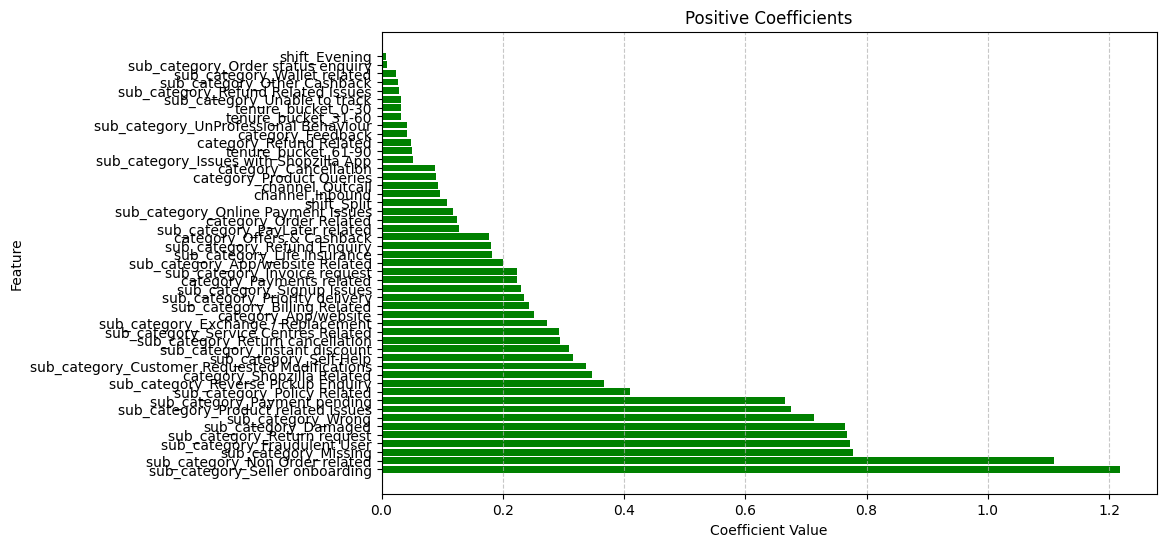

In [ ]:
positive_coefficients_sorted = positive_coefficients.sort_values(by='Coefficient', ascending=False)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(positive_coefficients_sorted['Feature'], positive_coefficients_sorted['Coefficient'], color='green')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Positive Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

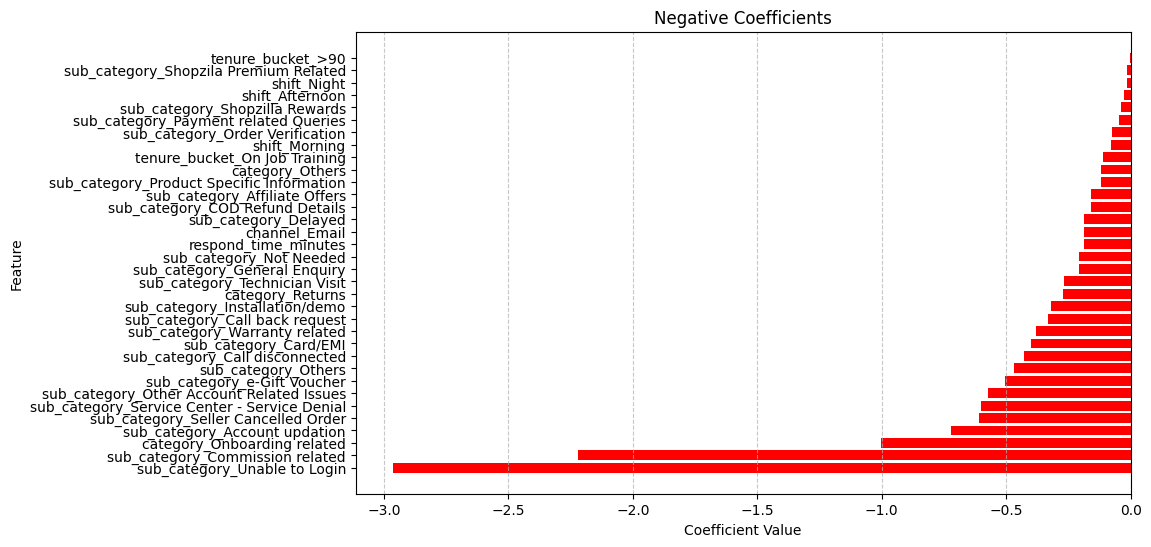

In [ ]:
negative_coefficients_sorted = negative_coefficients.sort_values(by='Coefficient', ascending=True)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(negative_coefficients_sorted['Feature'], negative_coefficients_sorted['Coefficient'], color='red')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Negative Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Evaluation:**
- `Mean Squared Error (MSE):` The MSE, which quantifies the average squared difference between actual and predicted CSAT scores, was approximately 1.78. This value indicates the overall accuracy of the model in predicting CSAT scores. A lower MSE suggests better model performance.

- `Intercept:` The intercept of the regression model was approximately 4.05. This intercept represents the CSAT score predicted by the model when the respond_time_seconds variable is zero. It provides a baseline CSAT score for comparison.

- `Coefficient:` Evaluation of the coefficients reveals the impact of each feature on the predicted CSAT score. Features with positive coefficients contribute positively to the CSAT score, while those with negative coefficients contribute negatively. For instance, a positive coefficient for 'tenure_bucket' implies that longer tenure tends to result in higher CSAT scores, while a negative coefficient for 'respond_time_seconds' suggests that longer response times are associated with lower CSAT scores.

>### Logistic Regression Model

In [ ]:
data_2 = data.copy()

# Define features (X) and target variable (y)
X = data_2[['channel', 'category', 'sub_category', 'tenure_bucket', 'shift', 'respond_time_minutes']]
y = data_2['CSAT_class']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_lg = model.predict(X_test)

# Evaluate the model
print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred_lg))
print("Confusion Matrix of Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lg))
print("\nClassification Report of Logistic Regression:")
print(classification_report(y_test, y_pred_lg))

Accuracy of Logistic Regression: 0.82877429868467
Confusion Matrix of Logistic Regression:
[[   86  2885]
 [   57 14154]]

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

    Negative       0.60      0.03      0.06      2971
    Positive       0.83      1.00      0.91     14211

    accuracy                           0.83     17182
   macro avg       0.72      0.51      0.48     17182
weighted avg       0.79      0.83      0.76     17182



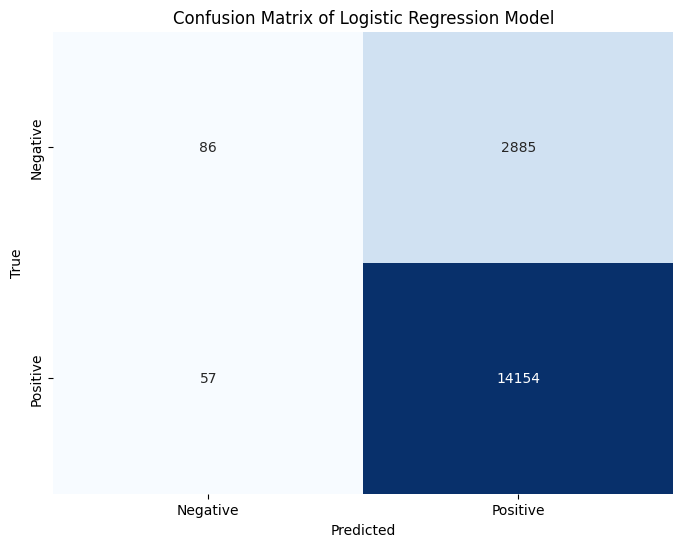

In [ ]:
class_labels = ['Negative', "Positive"]

# Calculate the confusion matrix
cm_lg = confusion_matrix(y_test, y_pred_lg)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.title('Confusion Matrix of Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(ticks=[0.5, 1.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5], labels=class_labels)

# Show plot
plt.show()

**Evaluation: Logistic Regression Model**
- The overall accuracy of the model is 83%.
- These results indicate that the model performs relatively well in predicting positive CSAT classes, with a high precision, recall, and F1-score. However, it performs poorly in predicting negative CSAT classes, with a low precision, recall, and F1-score.

>### Random Forest Model

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred_rf = model.predict(X_test)

# Evaluate the model
print("Accuracy of Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix of Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report of Random Forest:\n", classification_report(y_test, y_pred_rf))

Accuracy of Random Forest: 0.7859969735769992
Confusion Matrix of Random Forest:
 [[  486  2485]
 [ 1192 13019]]

Classification Report of Random Forest:
               precision    recall  f1-score   support

    Negative       0.29      0.16      0.21      2971
    Positive       0.84      0.92      0.88     14211

    accuracy                           0.79     17182
   macro avg       0.56      0.54      0.54     17182
weighted avg       0.74      0.79      0.76     17182



>### **Decision Tree**

In [ ]:
# Now, let's initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model with the oversampled training data
decision_tree.fit(X_train, y_train)

# Predict on the testing set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
print("Accuracy of Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix of Decision Tree:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report of Decision Tree:\n", classification_report(y_test, y_pred_dt))

Accuracy of Decision Tree: 0.7719124665347457
Confusion Matrix of Decision Tree:
 [[  587  2384]
 [ 1535 12676]]
Classification Report of Decision Tree:
               precision    recall  f1-score   support

    Negative       0.28      0.20      0.23      2971
    Positive       0.84      0.89      0.87     14211

    accuracy                           0.77     17182
   macro avg       0.56      0.54      0.55     17182
weighted avg       0.74      0.77      0.76     17182



>### **Modeling with SMOTE**

Use SMOTE to oversampling for the minority class to balance the class distribution.

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rfsmote = model.predict(X_test)
print("Accuracy of Random Forest with SMOTE:", accuracy_score(y_test, y_pred_rfsmote))
print("Confusion Matrix of Random Forest with SMOTE:\n", confusion_matrix(y_test, y_pred_rfsmote))
print("Classification Report of Random Forest with SMOTE:\n", classification_report(y_test, y_pred_rfsmote))

Accuracy of Random Forest with SMOTE: 0.7005587242463043
Confusion Matrix of Random Forest with SMOTE:
 [[ 1082  1889]
 [ 3256 10955]]
Classification Report of Random Forest with SMOTE:
               precision    recall  f1-score   support

    Negative       0.25      0.36      0.30      2971
    Positive       0.85      0.77      0.81     14211

    accuracy                           0.70     17182
   macro avg       0.55      0.57      0.55     17182
weighted avg       0.75      0.70      0.72     17182



Comparison between before and after applying SMOTE

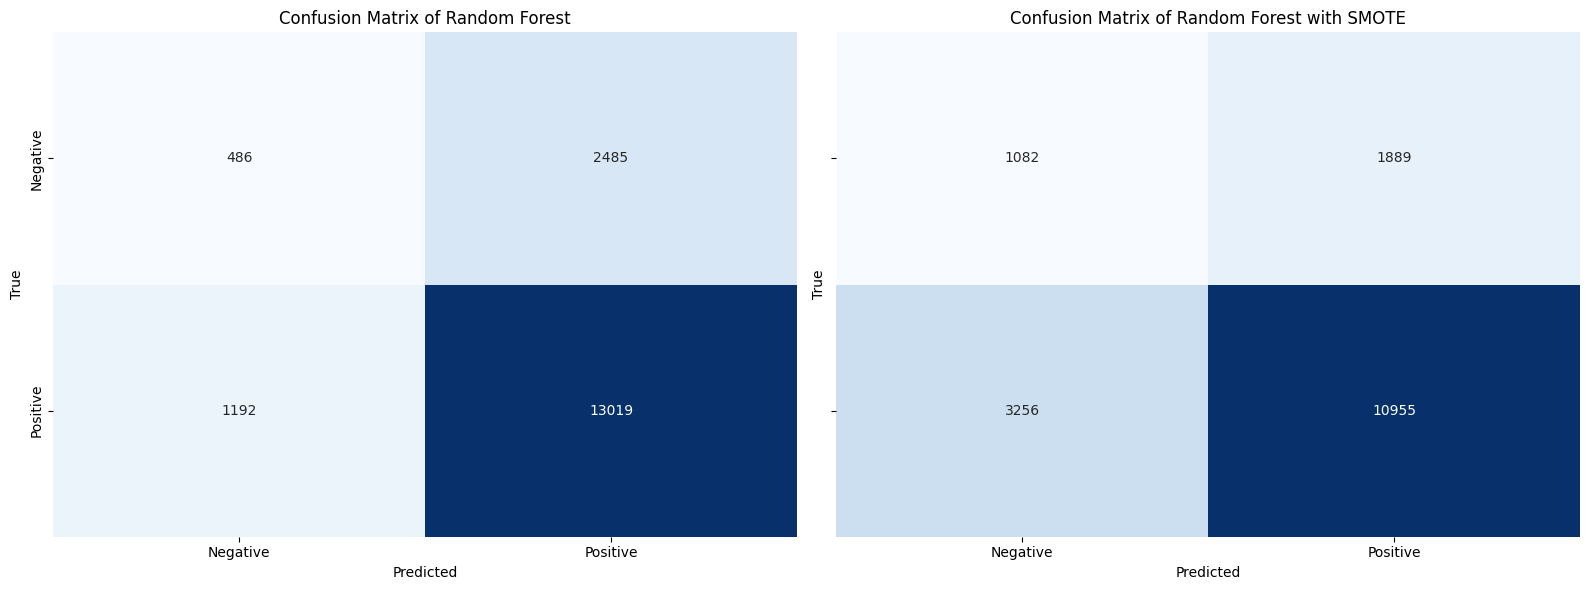

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rfsmote = confusion_matrix(y_test, y_pred_rfsmote)

class_labels = ['Negative', 'Positive']

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix of Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_xticklabels(class_labels)
axes[0].set_yticklabels(class_labels)

# Random Forest with SMOTE Confusion Matrix
sns.heatmap(cm_rfsmote, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix of Random Forest with SMOTE')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_xticklabels(class_labels)
axes[1].set_yticklabels(class_labels)

plt.tight_layout()
plt.show()

In [ ]:
# Now, let's initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model with the oversampled training data
decision_tree.fit(X_train_smote, y_train_smote)

# Predict on the testing set
y_pred_dtsmote = decision_tree.predict(X_test)

# Evaluate the model
print("Accuracy of Decision Tree with SMOTE:", accuracy_score(y_test, y_pred_dtsmote))
print("Confusion Matrix of Decision Tree with SMOTE:\n", confusion_matrix(y_test, y_pred_dtsmote))
print("Classification Report of Decision Tree with SMOTE:\n", classification_report(y_test, y_pred_dtsmote))

Accuracy of Decision Tree with SMOTE: 0.6989291118612502
Confusion Matrix of Decision Tree with SMOTE:
 [[ 1083  1888]
 [ 3285 10926]]
Classification Report of Decision Tree with SMOTE:
               precision    recall  f1-score   support

    Negative       0.25      0.36      0.30      2971
    Positive       0.85      0.77      0.81     14211

    accuracy                           0.70     17182
   macro avg       0.55      0.57      0.55     17182
weighted avg       0.75      0.70      0.72     17182



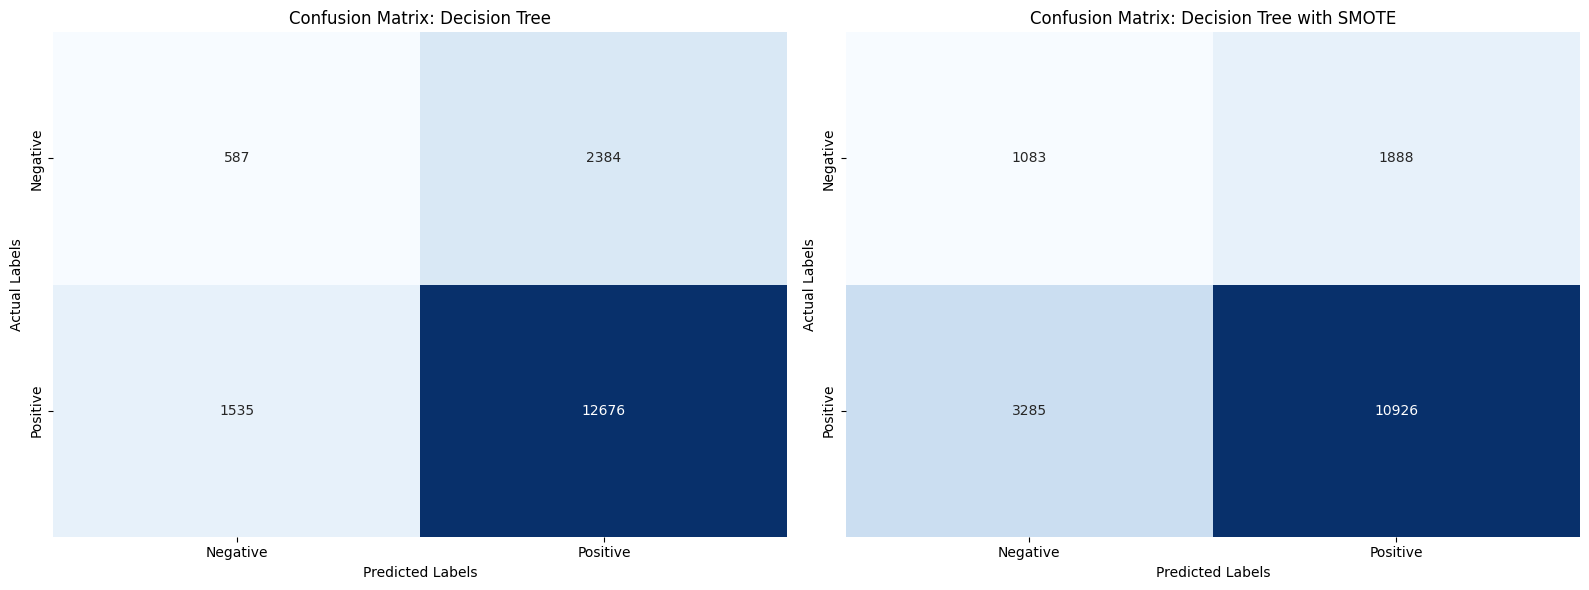

In [ ]:
# Calculate confusion matrices
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dtsmote = confusion_matrix(y_test, y_pred_dtsmote)

# Class labels for the plot
class_labels = ['Negative', 'Positive']

# Create a figure for the subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for Decision Tree Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix: Decision Tree')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('Actual Labels')
axes[0].set_xticklabels(class_labels)
axes[0].set_yticklabels(class_labels)

# Heatmap for Decision Tree with SMOTE Confusion Matrix
sns.heatmap(cm_dtsmote, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix: Decision Tree with SMOTE')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('Actual Labels')
axes[1].set_xticklabels(class_labels)
axes[1].set_yticklabels(class_labels)

# Show the plot
plt.tight_layout()
plt.show()

- Logistic Regression is highly accurate but fails in identifying negative classes, which may not be suitable if both classes are equally important.
- Random Forest has balanced metrics but still lacks in identifying negative classes.
- Using SMOTE with Random Forest and Decision Tree improves the recall for negative cases, indicating better identification of the minority class. However, this improvement comes with a trade-off in precision and overall accuracy.
=> The best model depends on the specific needs of your project. If avoiding false negatives is critical, SMOTE-enhanced models may be preferable. If overall accuracy is the goal, Logistic Regression may be suitable, but with the understanding that it fails to recognize the negative class effectively.


# V. Conclusion

In summary, the aggregate CSAT metrics are favorable, indicating general customer satisfaction. However, analysis of multiple factors shows that there are aspects that are dragging down customer reviews. The company needs to come up with a strategy to maintain the influence of groups with good results as well as improve factors that are tending to drag down CSAT scores. In addition, reviews need to be compared between months, between quarters, and between the same quarter in different years to further evaluate response trends.

# VI. Recommendations

The following actions that can be considered implementing:
1. Proactively respond more via **outcall channel**.
2. **Improve response time**, expecially in Email channel. Review feedback process to eliminate unnecessary lengthening factors
3. Conduct **internal training**: Retraining for low performance agents and set improvement goals. Closely supervise the training group because this group is handling a large workload. Peer Learning: Pair agents from the "Worst 5" with those from the "Top 5" to facilitate knowledge transfer and best practice sharing.Focus on low performance catefories
4. **Focus on low performance catefories**
5. **Reallocate for better workload**: Tenure bucket should keep max in 90 for better relationship management. Consider reallocating existing customers who are generally considered to give low ratings to employees with good results.


# Areas for Further Exploration

**Pareto Analysis**

In basic terms,we will see that 80% of negative feedback originates from just 20% of categories/sub-categories.

In [ ]:
# Create Pareto for category & Sub-category
dissatisfied_df = data[data['CSAT_class'] == 'Negative']

# Pareto analysis by category
category_counts = dissatisfied_df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
category_counts = category_counts.sort_values(by='count', ascending=False)

# Calculate cumulative percentage
category_counts['cumulative_percentage'] = (category_counts['count'].cumsum() / category_counts['count'].sum()) * 100

# Pareto analysis by sub-category
subcategory_counts = dissatisfied_df['sub_category'].value_counts().reset_index()
subcategory_counts.columns = ['sub_category', 'count']
subcategory_counts = subcategory_counts.sort_values(by='count', ascending=False)

# Calculate cumulative percentage
subcategory_counts['cumulative_percentage'] = (subcategory_counts['count'].cumsum() / subcategory_counts['count'].sum()) * 100

# Pareto chart - category
fig1 = go.Figure()
fig1.add_bar(x=category_counts['category'], y=category_counts['count'], name='Dissatisfaction Count', marker_color='#1f77b4')
fig1.add_scatter(x=category_counts['category'], y=category_counts['cumulative_percentage'], mode='lines+markers',
                 name='Cumulative Percentage', yaxis='y2', marker=dict(color='#e16060'))

# for v-line at 80%
threshold_index = (category_counts['cumulative_percentage'] >= 80).idxmax()
threshold_category = category_counts.loc[threshold_index, 'category']
fig1.add_shape(type="line", x0=threshold_category, y0=0, x1=threshold_category, y1=category_counts['count'].max(),
               line=dict(color="red", width=0.5,dash="dot"))

# Pareto chart - sub-category
fig2 = go.Figure()
fig2.add_bar(x=subcategory_counts['sub_category'], y=subcategory_counts['count'], name='Dissatisfaction Count', marker_color='#1f77b4')
fig2.add_scatter(x=subcategory_counts['sub_category'], y=subcategory_counts['cumulative_percentage'], mode='lines+markers',
                     name='Cumulative Percentage', yaxis='y2', marker=dict(color='#e16060'))

# for v-line at 80%
threshold_index = (subcategory_counts['cumulative_percentage'] >= 80).idxmax()
threshold_subcategory = subcategory_counts.loc[threshold_index, 'sub_category']
fig2.add_shape(type="line",x0=threshold_subcategory, y0=0, x1=threshold_subcategory, y1=subcategory_counts['count'].max(),
               line=dict(color="red", width=0.5,dash="dot"))

fig1.update_traces(marker_color='#ad84c6', selector=dict(type='bar'))
fig1.update_layout(title='Pareto Chart for Dissatisfaction by Category', xaxis_title='',
                   yaxis_title='Dissatisfaction Count', yaxis2=dict(title='', overlaying='y', side='right'),
                   legend=dict(x=0, y=1.1, orientation='h'), plot_bgcolor='white', paper_bgcolor='white')
fig1.update_yaxes(showgrid=False)
fig1.show()

fig2.update_traces(marker_color='#ad84c6', selector=dict(type='bar'))
fig2.update_layout(title='Pareto Chart for Dissatisfaction by Sub-category',xaxis_title='', height=700, yaxis_title='Dissatisfaction Count',
                   yaxis2=dict(title='', overlaying='y', side='right', color='#E1B12D'),
                   legend=dict(x=0, y=1.1, orientation='h'), plot_bgcolor='white', paper_bgcolor='white')
fig2.update_yaxes(showgrid=False)
fig2.show()

#**Tableau Dashboard**

In [ ]:
from IPython.display import HTML

# Tableau Public dashboard link
tableau_url = "https://public.tableau.com/app/profile/quynh.nhu.duong/viz/FinalProject-CS-eCommerceCustomerServiceSatisfaction/Story1?publish=yes"

# Display a clickable link
HTML(f'<a href="{tableau_url}" target="_blank">Click here to view the Tableau Dashboard</a>')

#**Powerpoint Presentation**

In [ ]:
from IPython import display

In [ ]:
display.IFrame(src="https://docs.google.com/presentation/d/127v5ffkYSR5fZJxncwIrsL_1wnc_R5mhYtaMhZJNi4U/edit#slide=id.g27212553c7f_1_467", width=990, height=599)


##**Thank you for your attention !**